# Project DTSC 3601: Measuring Food Desert Influence on Larceny Rates

### We are trying to predict whether or not a community has a higher risk for rising larceny rates based on the amount of food insecurity in the community. First models will be based on food insecurity indicators and second round of models will include a food insecurity measurement via a USDA:ERS dataset with amount of the population currently living in a food desert.

## Dataset Exploration- Initial Glances

In [1]:
# import starter packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crimedata2.csv') # read csv into pandas

In [3]:
df.shape # number of (rows, columns)

(2215, 147)

In [4]:
df.describe() # count, max, min, std, mean

fold    population  householdsize  racepctblack  racePctWhite  \
count  2215.000000  2.215000e+03    2215.000000   2215.000000   2215.000000   
mean      5.494357  5.311798e+04       2.707327      9.335102     83.979819   
std       2.872924  2.046203e+05       0.334120     14.247156     16.419080   
min       1.000000  1.000500e+04       1.600000      0.000000      2.680000   
25%       3.000000  1.436600e+04       2.500000      0.860000     76.320000   
50%       5.000000  2.279200e+04       2.660000      2.870000     90.350000   
75%       8.000000  4.302400e+04       2.850000     11.145000     96.225000   
max      10.000000  7.322564e+06       5.280000     96.670000     99.630000   

       racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
count   2215.000000  2215.000000  2215.000000  2215.000000  2215.000000  ...   
mean       2.670203     7.950176    14.445837    27.644840    13.975142  ...   
std        4.473843    14.589832     4.518623     6.181517     5.970747  ...   
min        0.030000     0.120000     4.580000     9.380000     4.640000  ...   
25%        0.620000     0.930000    12.250000    24.415000    11.320000  ...   
50%        1.230000     2.180000    13.620000    26.780000    12.540000  ...   
75%        2.670000     7.810000    15.360000    29.205000    14.345000  ...   
max       57.460000    95.290000    54.400000    70.510000    63.620000  ...   

       PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  \
count       2215.000000     2215.000000    2215.000000     2215.000000   
mean          61.539630       51.538596      77.411079       88.111865   
std           16.750061       10.517926      10.878186        7.287836   
min            6.750000       11.830000      27.950000       32.830000   
25%           50.110000       44.995000      72.060000       85.200000   
50%           64.490000       52.170000      79.490000       90.030000   
75%           74.855000       58.740000      85.135000       93.010000   
max           93.140000       78.560000      96.590000       99.900000   

          LandArea       PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
count  2215.000000   2215.000000     2215.000000          2215.000000   
mean     27.419955   2783.835034        3.041124             0.980163   
std     109.822600   2828.993341        4.912917             2.877128   
min       0.900000     10.000000        0.000000             0.000000   
25%       7.300000   1181.900000        0.360000             0.000000   
50%      13.700000   2027.300000        1.220000             0.000000   
75%      26.100000   3321.700000        3.365000             0.000000   
max    3569.800000  44229.900000       54.330000            48.440000   

           murders   murdPerPop  
count  2215.000000  2215.000000  
mean      7.764786     5.859296  
std      58.166468     9.156829  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     2.170000  
75%       3.000000     8.365000  
max    1946.000000    91.090000  

[8 rows x 104 columns]

In [5]:
df.head() # glance at dataframe

Êcommunityname state countyCode communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ         39          5320     1       11980   
1           Marpletownship    PA         45         47616     1       23123   
2               Tigardcity    OR          ?             ?     1       29344   
3         Gloversvillecity    NY         35         29443     1       16656   
4              Bemidjicity    MN          7          5068     1       11245   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           3.10          1.37         91.78          6.50  ...          14   
1           2.82          0.80         95.57          3.44  ...          57   
2           2.43          0.74         94.33          3.43  ...         274   
3           2.40          1.70         97.35          0.50  ...         225   
4           2.76          0.53         89.16          1.17  ...          91   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0       114.85        138     1132.08         16           131.26       2   
1       242.37        376     1598.78         26           110.55       1   
2       758.14       1797     4972.19        136            376.3      22   
3      1301.78        716     4142.56         47           271.93       ?   
4       728.93       1060     8490.87         91           728.93       5   

   arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0         16.41                41.02        1394.59  
1          4.25               127.56        1955.95  
2         60.87               218.59        6167.51  
3             ?               306.64              ?  
4         40.05                    ?        9988.79  

[5 rows x 147 columns]

#### See the '?', lets check for null values to see if we need to replace the '?'

## Dataset Exploration- Dealing with Unknown Values

In [6]:
df.isna().sum() # sum of all null values in each column

Êcommunityname         0
state                  0
countyCode             0
communityCode          0
fold                   0
                      ..
autoTheftPerPop        0
arsons                 0
arsonsPerPop           0
ViolentCrimesPerPop    0
nonViolPerPop          0
Length: 147, dtype: int64

#### Every row seems to say 0 null values, but we see previously that there are '?' in countyCode. Lets replace these values and then check the nulls.

In [7]:
df.replace('?', np.nan, inplace=True)

In [8]:
df.head(10)

Êcommunityname state countyCode communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ         39          5320     1       11980   
1           Marpletownship    PA         45         47616     1       23123   
2               Tigardcity    OR        NaN           NaN     1       29344   
3         Gloversvillecity    NY         35         29443     1       16656   
4              Bemidjicity    MN          7          5068     1       11245   
5          Springfieldcity    MO        NaN           NaN     1      140494   
6              Norwoodtown    MA         21         50250     1       28700   
7             Andersoncity    IN        NaN           NaN     1       59459   
8                Fargocity    ND         17         25700     1       74111   
9                 Wacocity    TX        NaN           NaN     1      103590   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           3.10          1.37         91.78          6.50  ...          14   
1           2.82          0.80         95.57          3.44  ...          57   
2           2.43          0.74         94.33          3.43  ...         274   
3           2.40          1.70         97.35          0.50  ...         225   
4           2.76          0.53         89.16          1.17  ...          91   
5           2.45          2.51         95.65          0.90  ...        2094   
6           2.60          1.60         96.57          1.47  ...         110   
7           2.45         14.20         84.87          0.40  ...         608   
8           2.46          0.35         97.11          1.25  ...         425   
9           2.62         23.14         67.60          0.92  ...        2397   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0       114.85        138     1132.08         16           131.26       2   
1       242.37        376     1598.78         26           110.55       1   
2       758.14       1797     4972.19        136            376.3      22   
3      1301.78        716     4142.56         47           271.93     NaN   
4       728.93       1060     8490.87         91           728.93       5   
5      1386.46       7690     5091.64        454            300.6     134   
6       372.09        288      974.19        144            487.1      17   
7        997.6       2250     3691.79        125            205.1       9   
8       532.66       3149     3946.71        206           258.18       8   
9      2221.81       6121     5673.63       1070            991.8      18   

   arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0         16.41                41.02        1394.59  
1          4.25               127.56        1955.95  
2         60.87               218.59        6167.51  
3           NaN               306.64            NaN  
4         40.05                  NaN        9988.79  
5         88.72               442.95        6867.42  
6          57.5               226.63        1890.88  
7         14.77               439.73        4909.26  
8         10.03               115.31        4747.58  
9         16.68              1544.24        8903.93  

[10 rows x 147 columns]

In [9]:
df.isna().sum()

Êcommunityname            0
state                     0
countyCode             1221
communityCode          1224
fold                      0
                       ... 
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
Length: 147, dtype: int64

#### Cool, now we know the amount of NaN in each column, we will explore datatypes and rename some things to make it easier to model in the future.

## Dataset Exploration- Datatypes

#### First, lets change the "Êcommunityname" column to an easier name, so we can use it or reference it later on, without having to figure out how to type that E.

In [10]:
df = df.rename(columns={'Êcommunityname': 'commName'})

In [11]:
df.head()

commName state countyCode communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ         39          5320     1       11980   
1           Marpletownship    PA         45         47616     1       23123   
2               Tigardcity    OR        NaN           NaN     1       29344   
3         Gloversvillecity    NY         35         29443     1       16656   
4              Bemidjicity    MN          7          5068     1       11245   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           3.10          1.37         91.78          6.50  ...          14   
1           2.82          0.80         95.57          3.44  ...          57   
2           2.43          0.74         94.33          3.43  ...         274   
3           2.40          1.70         97.35          0.50  ...         225   
4           2.76          0.53         89.16          1.17  ...          91   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0       114.85        138     1132.08         16           131.26       2   
1       242.37        376     1598.78         26           110.55       1   
2       758.14       1797     4972.19        136            376.3      22   
3      1301.78        716     4142.56         47           271.93     NaN   
4       728.93       1060     8490.87         91           728.93       5   

   arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0         16.41                41.02        1394.59  
1          4.25               127.56        1955.95  
2         60.87               218.59        6167.51  
3           NaN               306.64            NaN  
4         40.05                  NaN        9988.79  

[5 rows x 147 columns]

In [12]:
df.dtypes # data types of each column

commName               object
state                  object
countyCode             object
communityCode          object
fold                    int64
                        ...  
autoTheftPerPop        object
arsons                 object
arsonsPerPop           object
ViolentCrimesPerPop    object
nonViolPerPop          object
Length: 147, dtype: object

#### Since our target variable will be having to do with larcenies, we should convert these types to either int or float so they can be worked with and used for modeling.

In [13]:
# List of columns to convert to numeric
columns_to_convert = ['larcenies', 'larcPerPop']

# Convert these columns to numeric, forcing invalid values to NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

# make sure the conversion worked
print(df[columns_to_convert].dtypes)

larcenies     float64
larcPerPop    float64
dtype: object


## Dataset Exploration- Dropping Unnecessary Columns

#### OK so many of these columns have to do with other crimes, or have a lot of null values. Lets look at all the columns to get a feel for what columns we may need and which ones we can get rid of. 

In [14]:
df.columns.tolist()

['commName',
 'state',
 'countyCode',
 'communityCode',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumKidsBornNeverMar',
 'PctKidsBornNeverMar',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10

In [15]:
# now we can get the sum of all null values in each column
# viewing all columns with their datatypes as a list of tuples
data_na_totals = [(col, df[col].isna().sum()) for col in df.columns]

# print the list of column names with their datatypes
for col, na in data_na_totals:
    print(f"{col}: {na}")

commName: 0
state: 0
countyCode: 1221
communityCode: 1224
fold: 0
population: 0
householdsize: 0
racepctblack: 0
racePctWhite: 0
racePctAsian: 0
racePctHisp: 0
agePct12t21: 0
agePct12t29: 0
agePct16t24: 0
agePct65up: 0
numbUrban: 0
pctUrban: 0
medIncome: 0
pctWWage: 0
pctWFarmSelf: 0
pctWInvInc: 0
pctWSocSec: 0
pctWPubAsst: 0
pctWRetire: 0
medFamInc: 0
perCapInc: 0
whitePerCap: 0
blackPerCap: 0
indianPerCap: 0
AsianPerCap: 0
OtherPerCap: 1
HispPerCap: 0
NumUnderPov: 0
PctPopUnderPov: 0
PctLess9thGrade: 0
PctNotHSGrad: 0
PctBSorMore: 0
PctUnemployed: 0
PctEmploy: 0
PctEmplManu: 0
PctEmplProfServ: 0
PctOccupManu: 0
PctOccupMgmtProf: 0
MalePctDivorce: 0
MalePctNevMarr: 0
FemalePctDiv: 0
TotalPctDiv: 0
PersPerFam: 0
PctFam2Par: 0
PctKids2Par: 0
PctYoungKids2Par: 0
PctTeen2Par: 0
PctWorkMomYoungKids: 0
PctWorkMom: 0
NumKidsBornNeverMar: 0
PctKidsBornNeverMar: 0
NumImmig: 0
PctImmigRecent: 0
PctImmigRec5: 0
PctImmigRec8: 0
PctImmigRec10: 0
PctRecentImmig: 0
PctRecImmig5: 0
PctRecImmig8: 0
Pc

#### After looking at this, and researching the original dataset, we have found that not all columns are needed. Most of the police columns and crime columns do not contribute to the question, and many are missing values. Since we are focusing on larceny, we should remove all of the other crime variables to reduce multicolliniarity. We are also not focusing on policing or per capita based on race. Dropping these columns will make it easier to sort through our dataset and find out what other variables are highly correlated with larceny.

In [16]:
# Make list of columns to remove
columns_to_remove = [
# Race variables
'whitePerCap','blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'RacialMatchCommPol',
# Crime-related variables
'murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop',
'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'autoTheft',
'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop', 'nonViolPerPop',
# Gender-related variables
'MalePctNevMarr', 
# Police-related variables
'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',
'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'PctPolicWhite', 'PctPolicBlack',
'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
'LemasPctOfficDrugUn', 'PolicBudgPerPop'
]

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

# Display the remaining columns to verify
print("Remaining columns after removal:")
print(df.columns)

Remaining columns after removal:
Index(['commName', 'state', 'countyCode', 'communityCode', 'fold',
       'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian',
       ...
       'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85',
       'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans', 'larcenies',
       'larcPerPop'],
      dtype='object', length=101)


## Dataset Exploration- Distributions

#### We will be looking at distributions of variables before and after removing null values, to see if it drastically skews data. This is to compare if there is any drastic change after removing NaN data.

<Axes: xlabel='larcenies'>

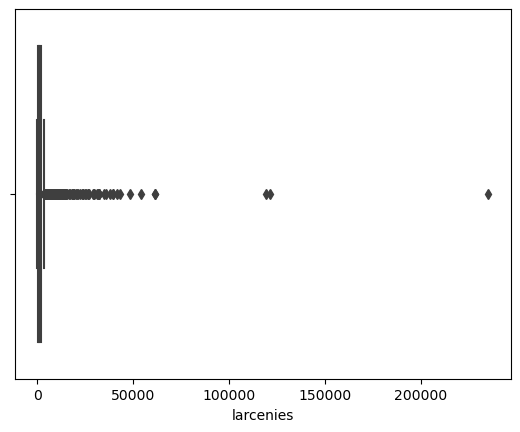

In [17]:
sns.boxplot(data=df, x="larcenies")

In [18]:
df.iloc[df['larcenies'].argmax()]

commName          NewYorkcity
state                      NY
countyCode                NaN
communityCode             NaN
fold                        1
                     ...     
LandArea                320.1
PopDens               22878.2
PctUsePubTrans          54.33
larcenies            235132.0
larcPerPop            3212.39
Name: 21, Length: 101, dtype: object

<Axes: xlabel='larcenies', ylabel='Density'>

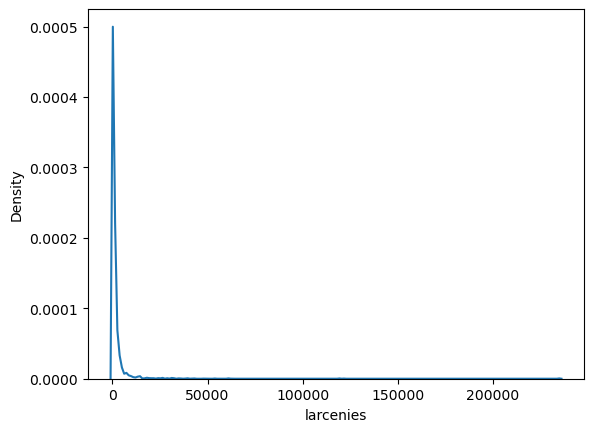

In [19]:
sns.kdeplot(data=df, x="larcenies", bw_adjust=.2)

<Axes: xlabel='larcPerPop'>

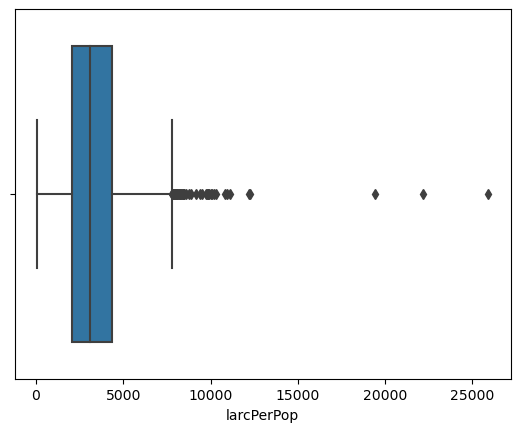

In [20]:
sns.boxplot(data=df, x="larcPerPop")

In [21]:
df.iloc[df['larcPerPop'].argmax()]

commName          EastLongmeadowtown
state                             MA
countyCode                        13
communityCode                  19645
fold                               9
                         ...        
LandArea                        13.4
PopDens                        995.0
PctUsePubTrans                  0.56
larcenies                     3557.0
larcPerPop                  25910.55
Name: 1905, Length: 101, dtype: object

<Axes: xlabel='larcPerPop', ylabel='Density'>

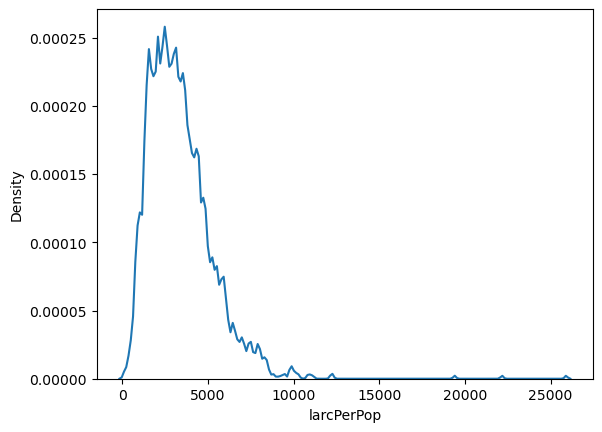

In [22]:
sns.kdeplot(data=df, x="larcPerPop", bw_adjust=.2)

#### In our LitReview, there are many different researched variables that seem to influence violent crime rates. Lack of guidance or negative relationships with others, low educational level, unemployment, etc. We will be exploring these and more by including food insecurity to see its effect on larceny rates. Those who are more likely to suffer from food insecurity are those who experience economic or monetary strain as well, and the middle of this venn diagram may show an insight to larceny levels rising or even doing the opposite and falling! Here are some other distributions of variables that may be used in our model, according to current research linking economic stress to crime.

<Axes: xlabel='medIncome'>

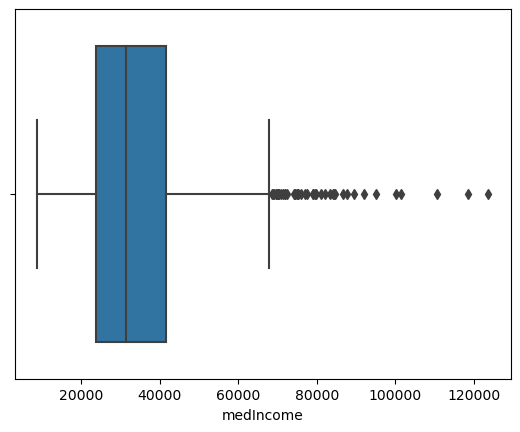

In [23]:
sns.boxplot(data=df, x="medIncome")

In [24]:
df.iloc[df['medIncome'].argmax()]

commName          Hillsboroughtown
state                           CA
countyCode                     NaN
communityCode                  NaN
fold                            10
                        ...       
LandArea                       6.4
PopDens                     1655.3
PctUsePubTrans                3.89
larcenies                     78.0
larcPerPop                  691.24
Name: 2105, Length: 101, dtype: object

<Axes: xlabel='medIncome', ylabel='Density'>

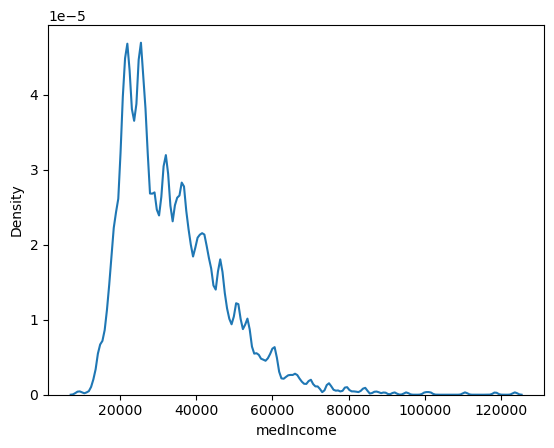

In [25]:
sns.kdeplot(data=df, x="medIncome", bw_adjust=.2)

<Axes: xlabel='PctPopUnderPov'>

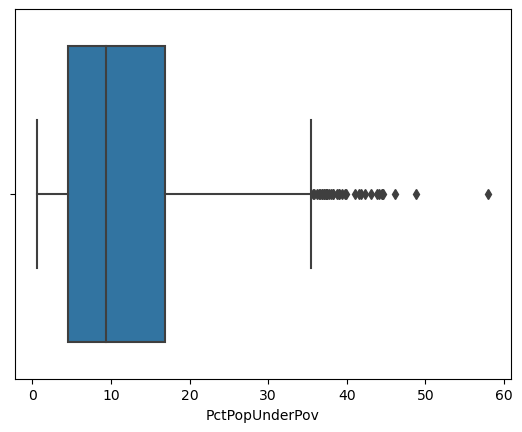

In [26]:
sns.boxplot(data=df, x="PctPopUnderPov")

In [27]:
df.iloc[df['PctPopUnderPov'].argmax()]

commName          BentonHarborcity
state                           MI
countyCode                      21
communityCode                 7520
fold                             8
                        ...       
LandArea                       4.6
PopDens                     2813.4
PctUsePubTrans                 2.6
larcenies                    880.0
larcPerPop                  6637.0
Name: 1705, Length: 101, dtype: object

<Axes: xlabel='PctPopUnderPov', ylabel='Density'>

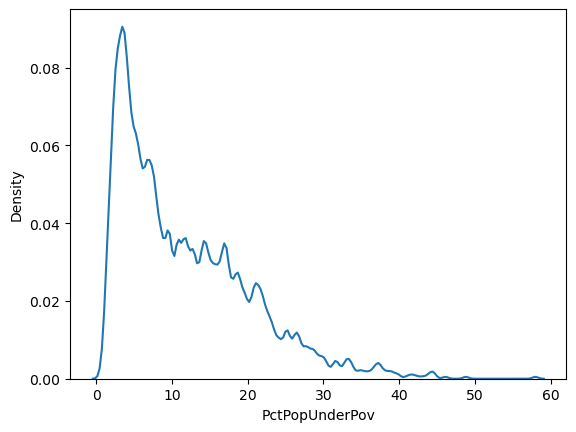

In [28]:
sns.kdeplot(data=df, x="PctPopUnderPov", bw_adjust=.2)

<Axes: xlabel='PctUnemployed'>

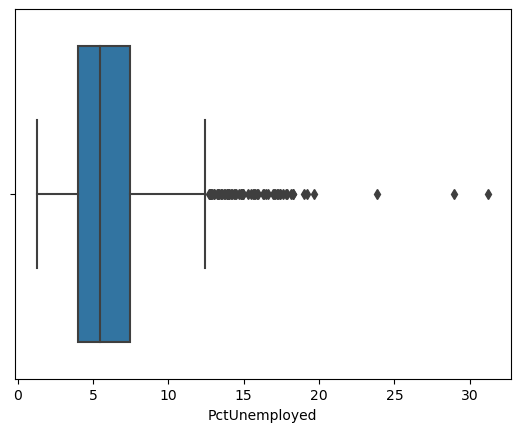

In [29]:
sns.boxplot(data=df, x="PctUnemployed")

In [30]:
df.iloc[df['PctUnemployed'].argmax()]

commName          HighlandParkcity
state                           MI
countyCode                     163
communityCode                38180
fold                             8
                        ...       
LandArea                       3.1
PopDens                     6524.3
PctUsePubTrans               20.94
larcenies                    833.0
larcPerPop                 4131.12
Name: 1730, Length: 101, dtype: object

<Axes: xlabel='PctUnemployed', ylabel='Density'>

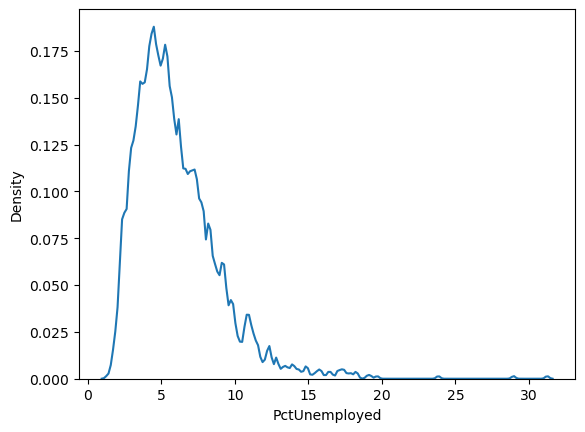

In [31]:
sns.kdeplot(data=df, x="PctUnemployed", bw_adjust=.2)

<Axes: xlabel='FemalePctDiv'>

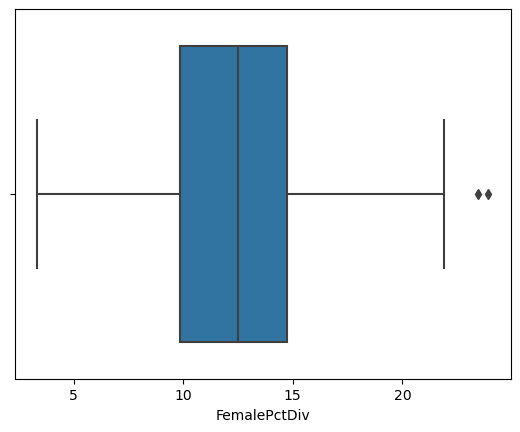

In [32]:
sns.boxplot(data=df, x="FemalePctDiv")

In [33]:
df.iloc[df['FemalePctDiv'].argmax()]

commName          HighlandParkcity
state                           MI
countyCode                     163
communityCode                38180
fold                             8
                        ...       
LandArea                       3.1
PopDens                     6524.3
PctUsePubTrans               20.94
larcenies                    833.0
larcPerPop                 4131.12
Name: 1730, Length: 101, dtype: object

<Axes: xlabel='FemalePctDiv', ylabel='Density'>

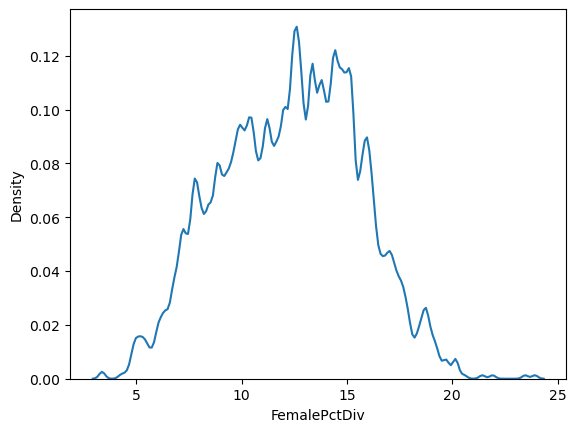

In [34]:
sns.kdeplot(data=df, x="FemalePctDiv", bw_adjust=.2)

<Axes: xlabel='pctWPubAsst'>

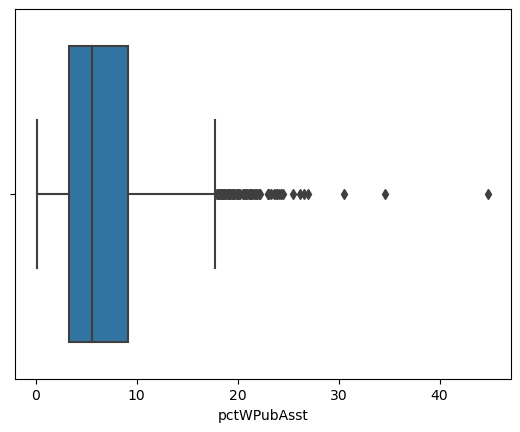

In [35]:
sns.boxplot(data=df, x="pctWPubAsst")

In [36]:
df.iloc[df['pctWPubAsst'].argmax()]

commName          BentonHarborcity
state                           MI
countyCode                      21
communityCode                 7520
fold                             8
                        ...       
LandArea                       4.6
PopDens                     2813.4
PctUsePubTrans                 2.6
larcenies                    880.0
larcPerPop                  6637.0
Name: 1705, Length: 101, dtype: object

<Axes: xlabel='pctWPubAsst', ylabel='Density'>

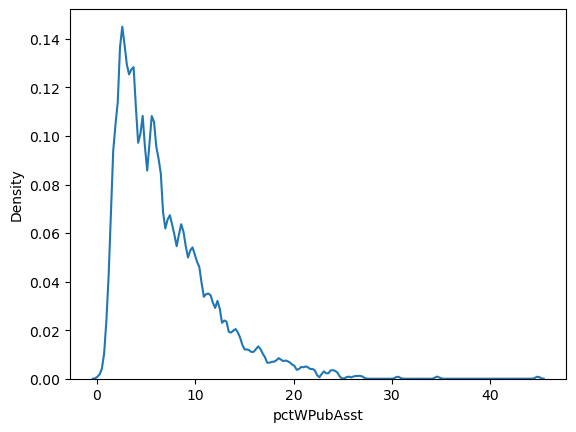

In [37]:
sns.kdeplot(data=df, x="pctWPubAsst", bw_adjust=.2)

<Axes: xlabel='PctNotHSGrad'>

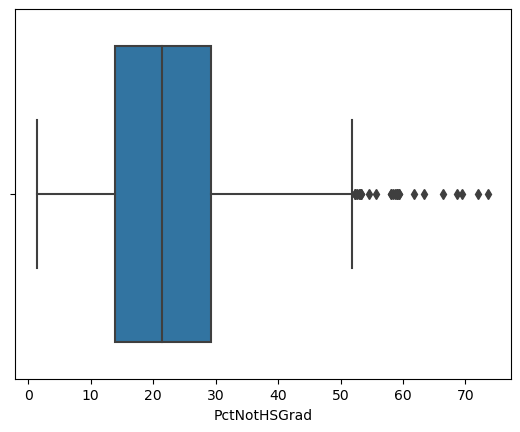

In [38]:
sns.boxplot(data=df, x="PctNotHSGrad")

In [39]:
df.iloc[df['PctNotHSGrad'].argmax()]

commName          BellGardenscity
state                          CA
countyCode                    NaN
communityCode                 NaN
fold                            6
                       ...       
LandArea                      2.6
PopDens                   16265.4
PctUsePubTrans               6.68
larcenies                   562.0
larcPerPop                1317.86
Name: 1330, Length: 101, dtype: object

<Axes: xlabel='PctNotHSGrad', ylabel='Density'>

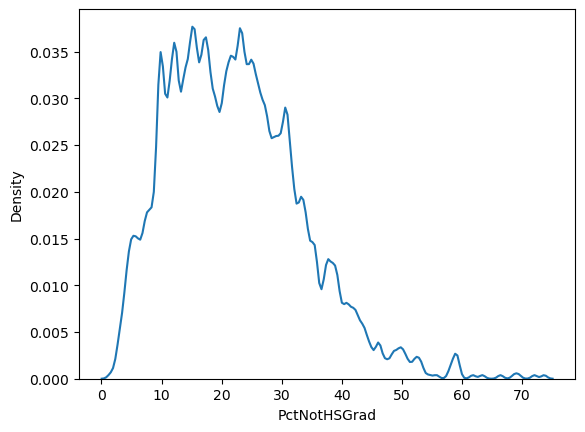

In [40]:
sns.kdeplot(data=df, x="PctNotHSGrad", bw_adjust=.2)

<Axes: xlabel='PctVacantBoarded'>

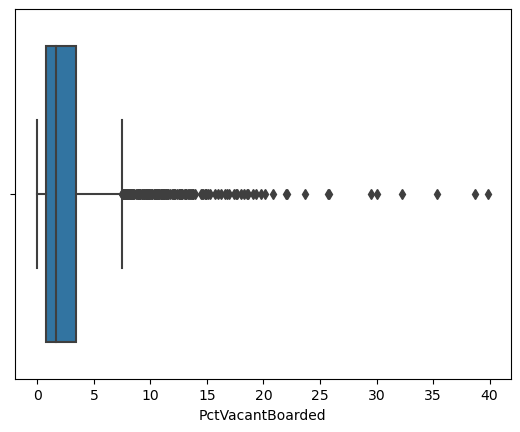

In [41]:
sns.boxplot(data=df, x="PctVacantBoarded")

In [42]:
df.iloc[df['PctVacantBoarded'].argmax()]

commName          Camdencity
state                     NJ
countyCode                 7
communityCode          10000
fold                       4
                     ...    
LandArea                 9.1
PopDens               9575.4
PctUsePubTrans         18.34
larcenies             3926.0
larcPerPop           4713.31
Name: 720, Length: 101, dtype: object

<Axes: xlabel='PctVacantBoarded', ylabel='Density'>

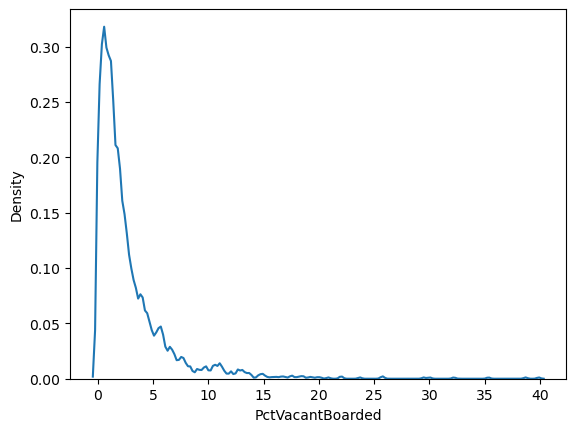

In [43]:
sns.kdeplot(data=df, x="PctVacantBoarded", bw_adjust=.2)

## Dataset Exploration- Null Value Handling

In [44]:
df.isna().sum()

commName             0
state                0
countyCode        1221
communityCode     1224
fold                 0
                  ... 
LandArea             0
PopDens              0
PctUsePubTrans       0
larcenies            3
larcPerPop           3
Length: 101, dtype: int64

#### Alrighty, there are still some null values but it looks like the majority are not usable anyway, being the county code columns or community code columns. Lets drop these using a threshold approach, and then print out the remaining columns after removal.

In [45]:
percent_null = 40.0
min_count =  int(((100-percent_null)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_count)

In [46]:
# Display the remaining columns to verify
print("Remaining columns after removal:")
print(df.columns)

Remaining columns after removal:
Index(['commName', 'state', 'fold', 'population', 'householdsize',
       'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
       'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban',
       'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
       'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
       'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
       'PctWorkMom', 'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
      

In [47]:
df.isna().sum().max()

3

#### Yay!! The maximum null values in any column are significantly reduced. This looks like the amount of nulls in the larcenies column. These can either be filled in with the mean, or dropped altogether. Since we are not going to overgeneralize about these communities, we should drop the rows that contain these nulls. Even though it is dropping some communities in our dataset, ultimately it is such a small number, it should not affect the outcome in our models.

In [48]:
df = df.dropna(how='any', axis=0)

#### Using axis=0 drops any null rows in the dataframe

In [49]:
df.shape

(2212, 99)

#### Rows were successfully dropped. Lets continue with exploring correlations and feature importance, to determine which variables will be best at explaining our target variable.

In [50]:
df.head()

commName state  fold  population  householdsize  \
0  BerkeleyHeightstownship    NJ     1       11980           3.10   
1           Marpletownship    PA     1       23123           2.82   
2               Tigardcity    OR     1       29344           2.43   
3         Gloversvillecity    NY     1       16656           2.40   
4              Bemidjicity    MN     1       11245           2.76   

   racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  ...  \
0          1.37         91.78          6.50         1.88        12.47  ...   
1          0.80         95.57          3.44         0.85        11.01  ...   
2          0.74         94.33          3.43         2.35        11.36  ...   
3          1.70         97.35          0.50         0.70        12.55  ...   
4          0.53         89.16          1.17         0.52        24.46  ...   

   PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0           10.66             53.72           65.29          78.09   
1            8.30             77.17           71.27          90.22   
2            5.00             44.77           36.60          61.26   
3            2.04             88.71           56.70          90.17   
4            1.74             73.75           42.22          60.34   

   PctSameState85  LandArea  PopDens  PctUsePubTrans  larcenies  larcPerPop  
0           89.14       6.5   1845.9            9.63      138.0     1132.08  
1           96.12      10.6   2186.7            3.84      376.0     1598.78  
2           82.85      10.6   2780.9            4.37     1797.0     4972.19  
3           96.24       5.2   3217.7            3.31      716.0     4142.56  
4           89.02      11.5    974.2            0.38     1060.0     8490.87  

[5 rows x 99 columns]

## Correlations (Positive and Negative)

In [51]:
# Create a heatmap starting at the 5th index
df_subset = df.iloc[2:]

# Correlation
plt.figure(figsize=(100,100))
sns.heatmap(df_subset.corr(numeric_only=True),annot=True)
plt.title('Correlation of Attributes')
plt.show()

#### OK with all of the variables, there seems to be some high correlations but I am not sure what they are with, as they can barely be seen. Lets just pull up the positive and negative correlations to the target variable, 'larcPerPop'. This was chosen as the target variable because it is normalized, as this allows for fair comparisons across communities regardless of population size.

In [52]:
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target = correlation_matrix['larcPerPop'].sort_values(ascending=False)
print(correlation_with_target.head(15)) # top 15 variables correlated to larcPerPop

larcPerPop             1.000000
TotalPctDiv            0.525430
MalePctDivorce         0.514272
FemalePctDiv           0.511725
PctPopUnderPov         0.453399
PctHousNoPhone         0.452011
PctKidsBornNeverMar    0.409853
PctHousLess3BR         0.389333
racepctblack           0.362778
pctWPubAsst            0.354361
PctUnemployed          0.294718
PctNotHSGrad           0.287944
PctImmigRec10          0.235031
PctVacantBoarded       0.226359
PctLess9thGrade        0.222559
Name: larcPerPop, dtype: float64


In [53]:
print(correlation_with_target.tail(15)) # top 15 negatively correlated variables to larcPerPop

MedNumBR           -0.324710
OwnOccLowQuart     -0.334985
RentLowQ           -0.356803
RentMedian         -0.376195
RentHighQ          -0.377829
MedRent            -0.383123
pctWInvInc         -0.387047
PctHousOwnOcc      -0.394113
PctPersOwnOccup    -0.421113
medFamInc          -0.435611
medIncome          -0.454743
PctTeen2Par        -0.510077
PctYoungKids2Par   -0.516787
PctKids2Par        -0.545476
PctFam2Par         -0.550323
Name: larcPerPop, dtype: float64


#### Both of these sets of correlations are mostly over 35%, which is somewhat strong. Lets perform another correlation matrix and determine what variables are highly correlated. If certain variables have super high correlation, they may have instances of multicollinearity. After handling these, then we will determine if we should handle outliers or not based on the important features found. Usually outliers are handled after feature importance to avoid bias in model training. Since we are not using a train-test-split on this yet, we can just detect the features that are very similar or multicollinear and remove them, and then perform feature importance if needed.

## Dealing with Multicollinear Variables

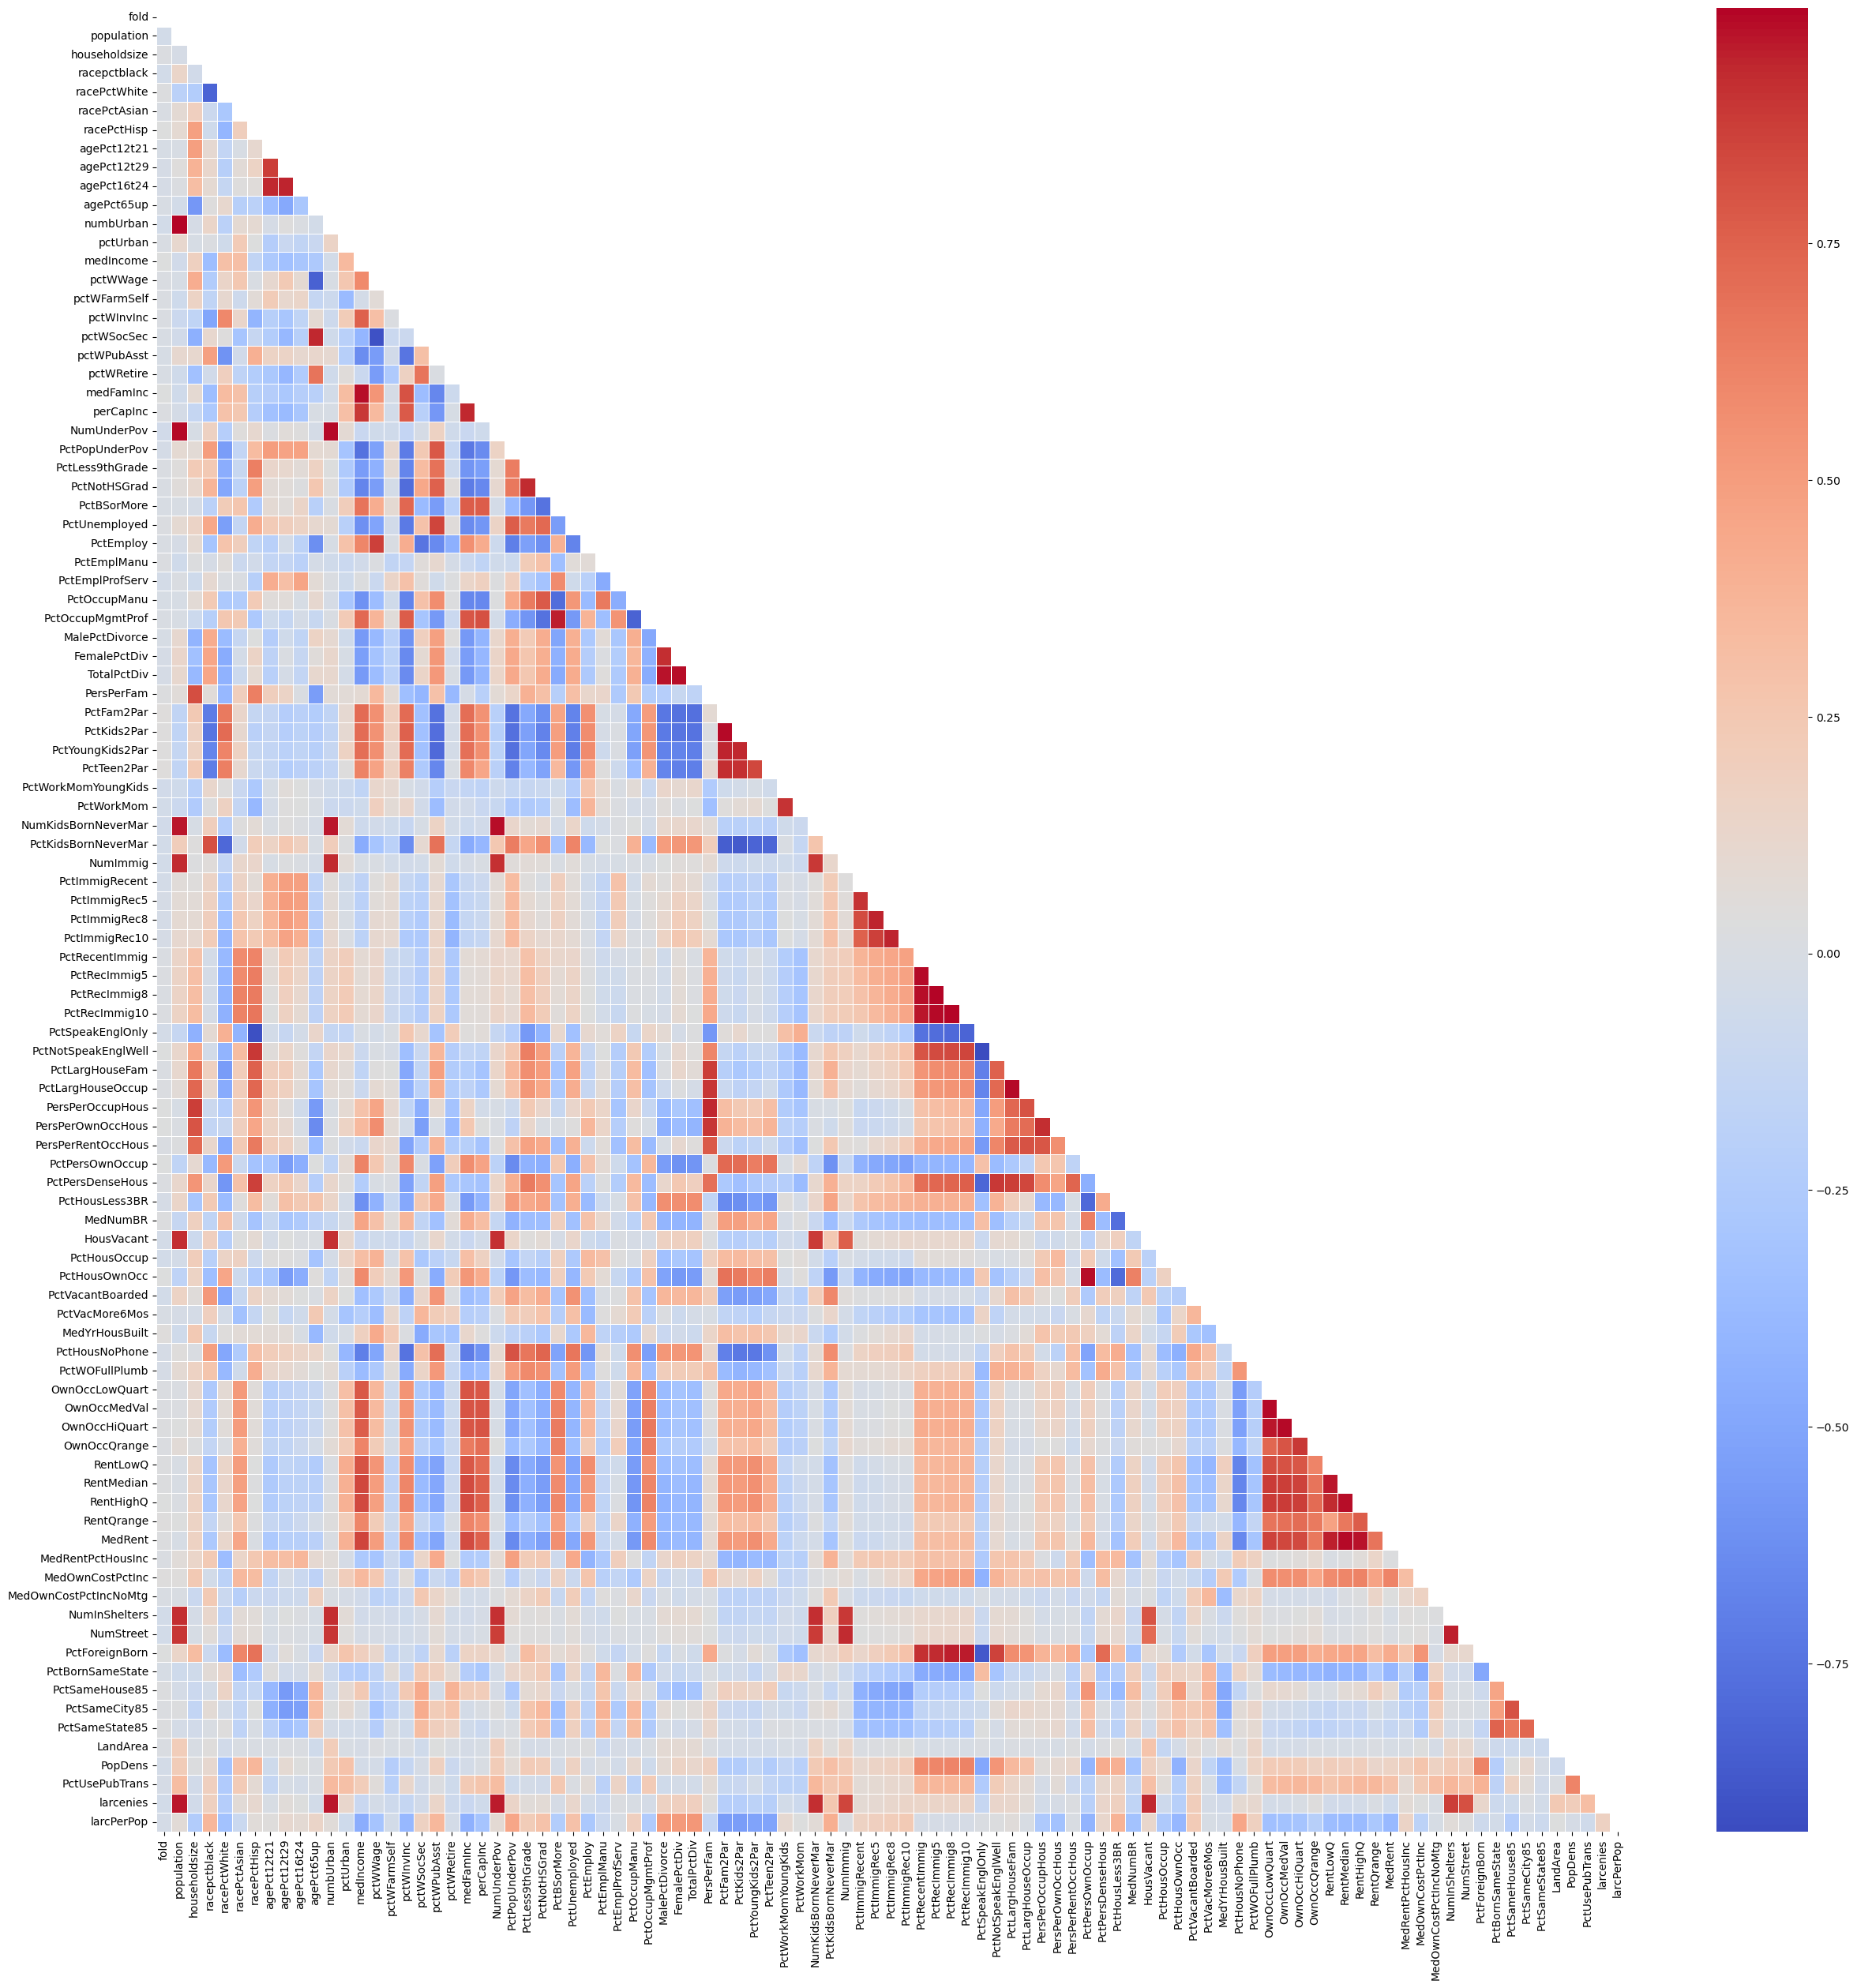

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up a mask for the upper triangle of the matrix (to avoid redundant pairs)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap of correlations
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, fmt='.2f', cmap='coolwarm', mask=mask, linewidths=0.5)
plt.show()

#### This matrix only shows the bottom half so we arent confused and include correlations twice (A and B, B and A). Below we will sort through the correlations to determine which variables are highly correlated with one another. If two variables are similar, we can remove one or choose what would work best for our data analysis.

In [55]:
# Calculate the correlation matrix for the features
corr_matrix = df.corr(numeric_only=True).abs()  # Absolute value of correlations

# Mask the upper triangle of the correlation matrix to avoid redundant comparisons
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns with correlation greater than 0.9
high_corr_var = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Print the pairs of features with high correlation
print("Highly Correlated Features (correlation > 0.9):")
for column in high_corr_var:
    correlated_columns = upper_triangle[column][upper_triangle[column] > 0.9].index
    print(f"{column} is highly correlated with: {list(correlated_columns)}")

Highly Correlated Features (correlation > 0.9):
agePct16t24 is highly correlated with: ['agePct12t21', 'agePct12t29']
numbUrban is highly correlated with: ['population']
pctWSocSec is highly correlated with: ['agePct65up', 'pctWWage']
medFamInc is highly correlated with: ['medIncome']
perCapInc is highly correlated with: ['medFamInc']
NumUnderPov is highly correlated with: ['population', 'numbUrban']
PctNotHSGrad is highly correlated with: ['PctLess9thGrade']
PctOccupMgmtProf is highly correlated with: ['PctBSorMore']
FemalePctDiv is highly correlated with: ['MalePctDivorce']
TotalPctDiv is highly correlated with: ['MalePctDivorce', 'FemalePctDiv']
PctKids2Par is highly correlated with: ['PctFam2Par']
PctYoungKids2Par is highly correlated with: ['PctFam2Par', 'PctKids2Par']
PctTeen2Par is highly correlated with: ['PctFam2Par', 'PctKids2Par']
PctWorkMom is highly correlated with: ['PctWorkMomYoungKids']
NumKidsBornNeverMar is highly correlated with: ['population', 'numbUrban', 'NumUnder

#### From this we can see that some features are incredibly correlated. For instance: TotalPctDiv is highly correlated with both MalePctDiv and FemalePctDiv. We should only keep one of these variables, since information could be bleeding from all variables into eachother and it would affect the predictability of our model. Other highly correlated variables, such as house occupancy and rent, will need to be sorted out as well.

In [56]:
# Remove highly correlated features to avoid multicollinearity
features_to_remove = ['agePct16t24', 'agePct12t21', 'agePct12t29', 'numbUrban', 'PctLess9thGrade',
                     'pctWSocSec', 'agePct65up', 'pctWWage', 'medFamInc', 'NumUnderPov',
                     'PctOccupMgmtProf', 'MalePctDivorce', 'TotalPctDiv', 'householdsize',
                     'PctKids2Par', 'PctTeen2Par', 'PctYoungKids2Par', 'PctWorkMomYoungKids',
                     'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctRecentImmig',
                     'PctRecImmig10', 'PctSpeakEnglOnly', 'PctLargHouseOccup', 'PersPerFam',
                     'PersPerOwnOccHous', 'PctHousOwnOcc', 'PctPersOwnOccup', 'OwnOccLowQuart',
                     'OwnOccHiQuart', 'RentMedian', 'RentLowQ', 'RentHighQ', 'larcenies'  
                     ]

# Drop the highly correlated features from the DataFrame
df_cleaned = df.drop(columns=features_to_remove)

#### This list of features were the ones removed from the original dataset for being too highly correlated with the other variables in the dataset. Lets glance at the dataset and then do some feature importance to determine which features to keep in our model.

In [57]:
df_cleaned

commName state  fold  population  racepctblack  \
0     BerkeleyHeightstownship    NJ     1       11980          1.37   
1              Marpletownship    PA     1       23123          0.80   
2                  Tigardcity    OR     1       29344          0.74   
3            Gloversvillecity    NY     1       16656          1.70   
4                 Bemidjicity    MN     1       11245          0.53   
...                       ...   ...   ...         ...           ...   
2210               Mercedcity    CA    10       56216          6.87   
2211            Pinevillecity    LA    10       12251         21.18   
2212              Yucaipacity    CA    10       32824          0.52   
2213             Beevillecity    TX    10       13547          3.37   
2214       WestSacramentocity    CA    10       28898          2.39   

      racePctWhite  racePctAsian  racePctHisp  pctUrban  medIncome  ...  \
0            91.78          6.50         1.88    100.00      75122  ...   
1            95.57          3.44         0.85    100.00      47917  ...   
2            94.33          3.43         2.35    100.00      35669  ...   
3            97.35          0.50         0.70      0.00      20580  ...   
4            89.16          1.17         0.52      0.00      17390  ...   
...            ...           ...          ...       ...        ...  ...   
2210         61.68         15.23        29.86    100.00      24727  ...   
2211         76.65          1.52         1.29    100.00      20321  ...   
2212         92.62          0.98        11.00    100.00      27182  ...   
2213         69.91          0.90        62.11      0.00      19899  ...   
2214         71.27          9.09        24.43     99.19      23287  ...   

      NumStreet  PctForeignBorn  PctBornSameState  PctSameHouse85  \
0             0           10.66             53.72           65.29   
1             0            8.30             77.17           71.27   
2             0            5.00             44.77           36.60   
3             0            2.04             88.71           56.70   
4             0            1.74             73.75           42.22   
...         ...             ...               ...             ...   
2210          0           18.90             52.67           39.19   
2211          0            2.24             75.16           49.12   
2212          0            7.35             48.66           46.73   
2213          0            2.28             82.26           54.05   
2214          2           16.49             55.29           48.74   

      PctSameCity85  PctSameState85  LandArea  PopDens  PctUsePubTrans  \
0             78.09           89.14       6.5   1845.9            9.63   
1             90.22           96.12      10.6   2186.7            3.84   
2             61.26           82.85      10.6   2780.9            4.37   
3             90.17           96.24       5.2   3217.7            3.31   
4             60.34           89.02      11.5    974.2            0.38   
...             ...             ...       ...      ...             ...   
2210          74.58           85.88      16.7   3365.4            0.59   
2211          78.79           92.85       7.3   1682.8            1.15   
2212          75.54           92.30      27.5   1195.2            0.12   
2213          79.72           94.06       6.3   2142.2            0.00   
2214          66.20           89.08      21.7   1331.0            1.39   

      larcPerPop  
0        1132.08  
1        1598.78  
2        4972.19  
3        4142.56  
4        8490.87  
...          ...  
2210     4225.82  
2211     4748.90  
2212     2435.97  
2213     3722.90  
2214     4819.20  

[2212 rows x 63 columns]

## Random Forest Feature Importance

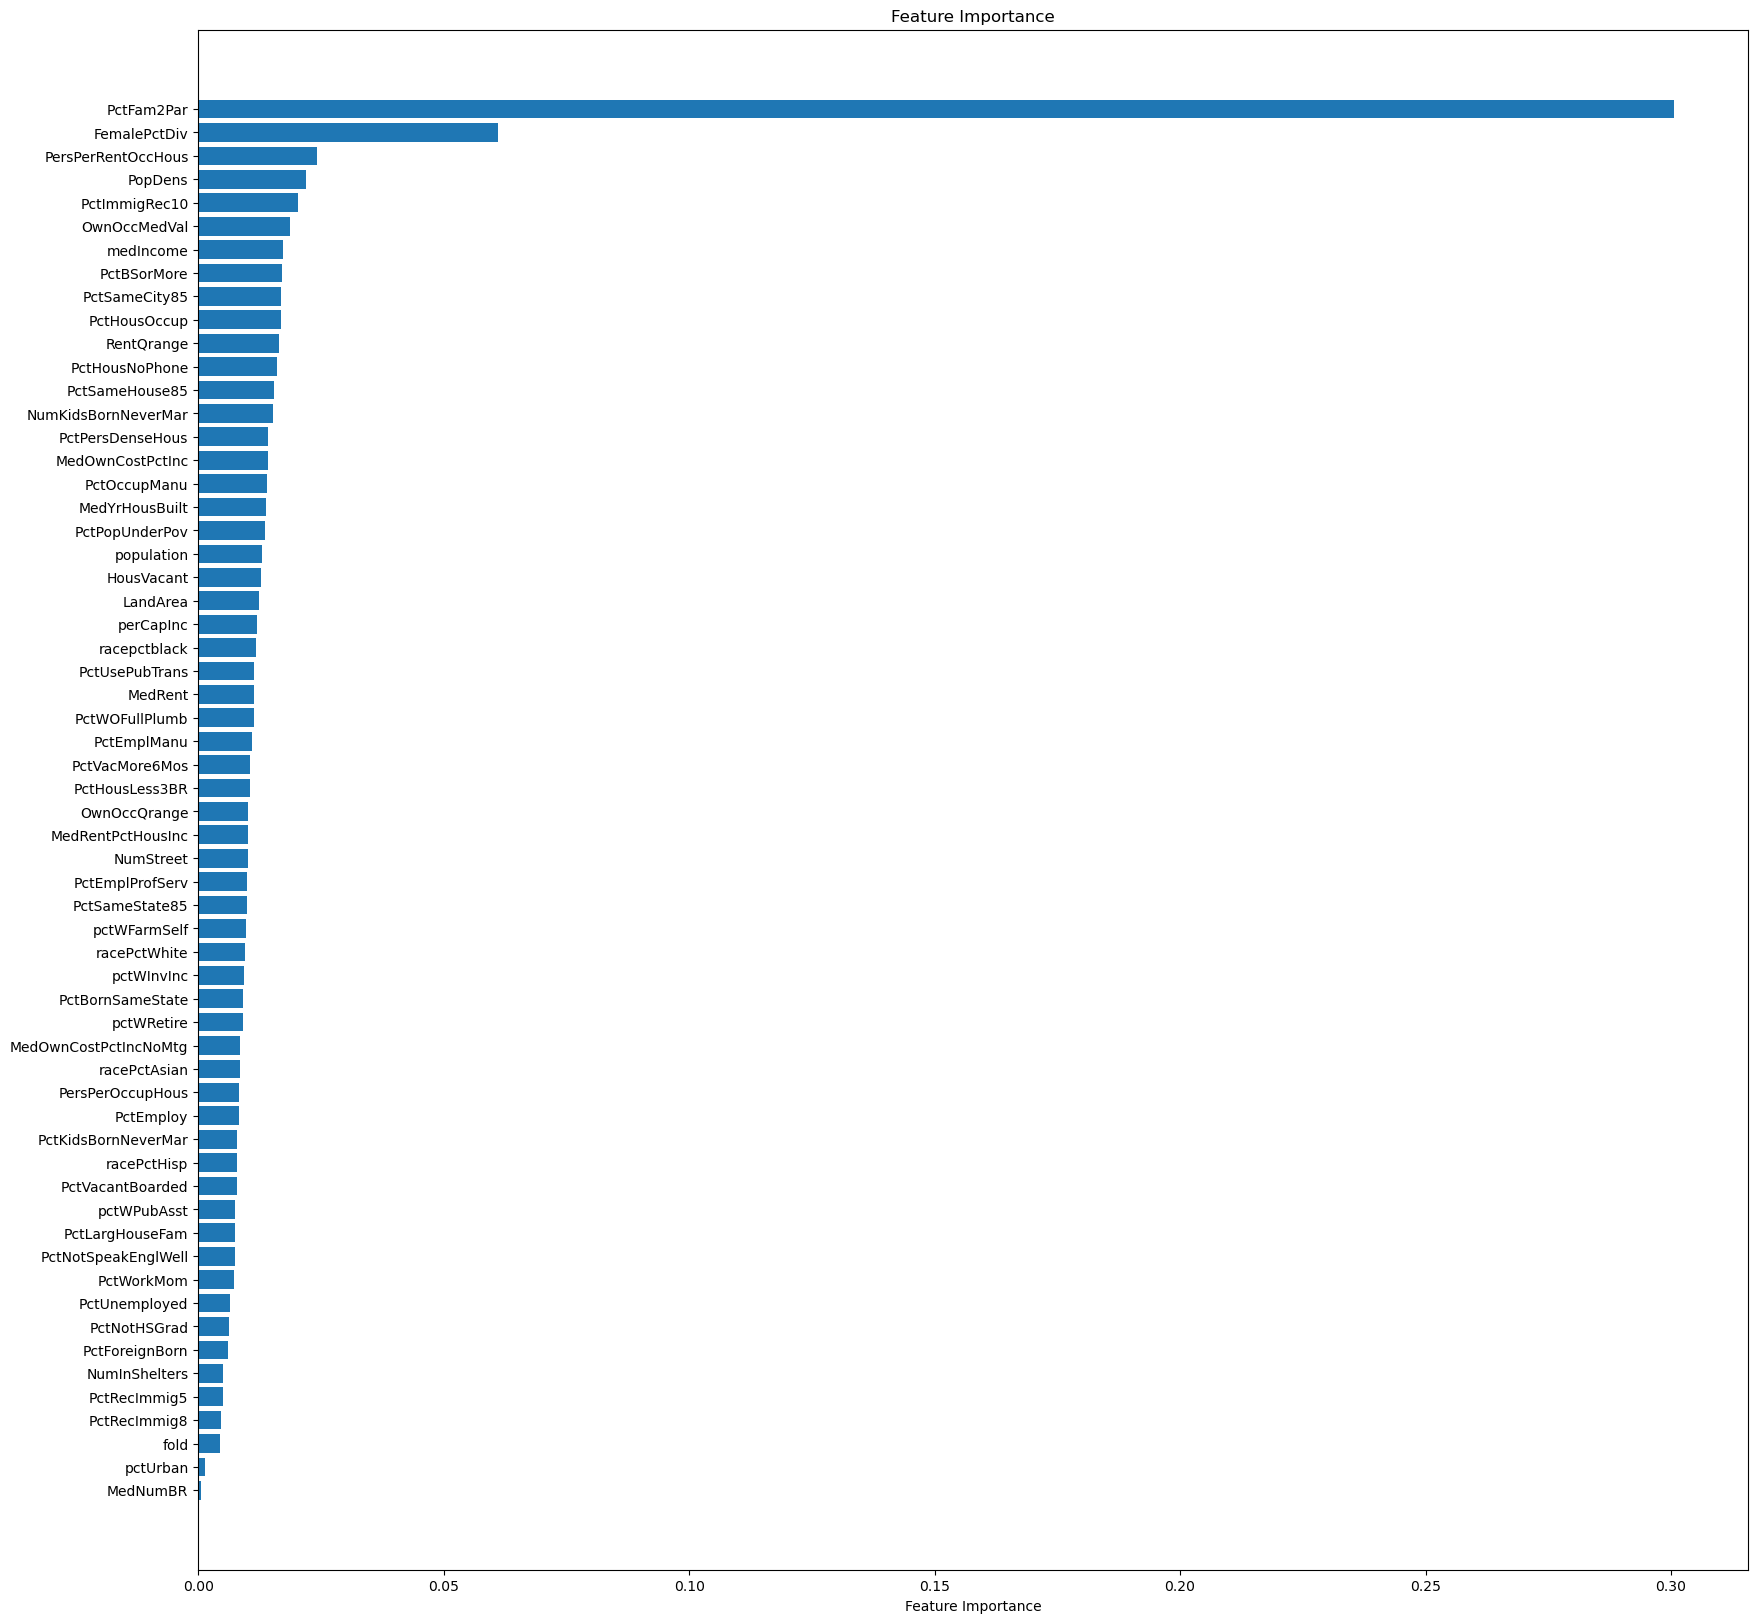

In [58]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the entire dataset (no train-test split needed here)
X_fi = df_cleaned.drop(columns=['larcPerPop', 'commName', 'state'])  # Features
y_fi = df_cleaned['larcPerPop']  # Target

model.fit(X_fi, y_fi)

# Get feature importance values
importances = model.feature_importances_

# Sort the features by importance
sorted_indices = importances.argsort()

# Plot the feature importances
plt.figure(figsize=(20, 20))
plt.title("Feature Importance")
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), X_fi.columns[sorted_indices])
plt.xlabel("Feature Importance")
plt.show()

#### I did feature importance with a random forest regressor, and this was the top list of important features. Surprisingly, PctFam2Par is the feature of highest importance, which was a little bit of a shock for me. FemalePctDiv was at the top, as well as PersPerRentOccHous, and medIncome. PctHousNoPhone and PctPopUnderPov were also of some importance. Lets do a Lasso regression to determine if we should snag these features, or if there are different ones that the Lasso regression decides are important.

## Lasso Regression

In [59]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model
lasso = Lasso(alpha=0.01, max_iter=10000)  # You can adjust the alpha parameter

# Fit the model to the data
lasso.fit(X_fi, y_fi)

# Get the coefficients (larger values indicate more importance)
lasso_coefficients = lasso.coef_

# Create a pandas series for easier readability
lasso_coefficients_series = pd.Series(lasso_coefficients, index=X_fi.columns).sort_values(ascending=False)

# Display the top 15 features
print("Top 15 Features Based on Lasso Coefficients:")
print(lasso_coefficients_series.head(20))

Top 15 Features Based on Lasso Coefficients:
PctLargHouseFam          120.293304
FemalePctDiv             108.669529
PctForeignBorn            95.299486
PctPopUnderPov            59.957521
PctKidsBornNeverMar       51.819340
PctHousNoPhone            46.308073
MedOwnCostPctIncNoMtg     46.121843
PctRecImmig5              43.784541
pctWInvInc                37.209087
PctNotSpeakEnglWell       33.308320
racePctAsian              28.282191
PctEmploy                 19.336438
MedYrHousBuilt            11.860817
PctImmigRec10              9.479645
PctSameCity85              8.897441
PctSameHouse85             8.288376
racePctWhite               4.312559
racepctblack               1.515185
RentQrange                 0.881307
NumInShelters              0.412053
dtype: float64


#### Ok, so FemalePctDiv, PctPopUnderPov, PctHouseNoPhone, and a feature that has to do with the percentage of large households. This is similar to the Random forest where it was PersPerRentOccHous, which is the # of people in a rental housing unit. We may need to remove or not use some of the housing features, since they are also seemingly highly correlated. Lets do a mutual info regression to see if we are getting consistent features as being important. This regression also doesnt seem to have PctFam2Par, which was our highest feature in Random Forest.

In [60]:
from sklearn.feature_selection import mutual_info_regression

# Compute mutual information
mi = mutual_info_regression(X_fi, y_fi)

# Create a pandas series for easier readability
mi_series = pd.Series(mi, index=X_fi.columns).sort_values(ascending=False)

print(mi_series.head(20))

PctFam2Par             0.266543
PctPopUnderPov         0.211434
FemalePctDiv           0.210603
medIncome              0.201124
PctHousNoPhone         0.199618
PctKidsBornNeverMar    0.192080
PctHousLess3BR         0.166723
NumKidsBornNeverMar    0.163710
OwnOccMedVal           0.152886
MedRent                0.150168
pctWPubAsst            0.138844
PctPersDenseHous       0.128129
HousVacant             0.127291
pctWInvInc             0.123276
RentQrange             0.119606
racepctblack           0.114207
perCapInc              0.110818
PctUnemployed          0.105171
racePctWhite           0.103136
PctNotHSGrad           0.098044
dtype: float64


#### Awesome! We are getting consistent hits for feature importance. PctFam2Par, PctPopUnderPov, FemalePctDiv, medIncome, PctHouseNoPhone, NumKidsBornNeverMar, medRent, pctWPubAsst, HousVacant, PersPerRentOccHous, PctUnemployed, etc!

## Creating Community Indicators

#### In order to best represent our data, we will need to make community indicators out of the variables we already have! This means combining variables or representing them in a way that we can fine tune our model. Since we know that many communities who suffer from food insecurity are usually those with higher minority populations, more single females/parents, people who live in dense housing, those under the poverty line, and those unemployed. After creating the community indicators, we will look at their distributions to determine if outlier removal later is needed.

### pctMinority

The percentage of the population that is a minority, measured by subtracting the white percentage from the whole

In [61]:
# Create the pctMinority variable
df_cleaned['pctMinority'] = 100 - df_cleaned['racePctWhite']

<Axes: xlabel='pctMinority'>

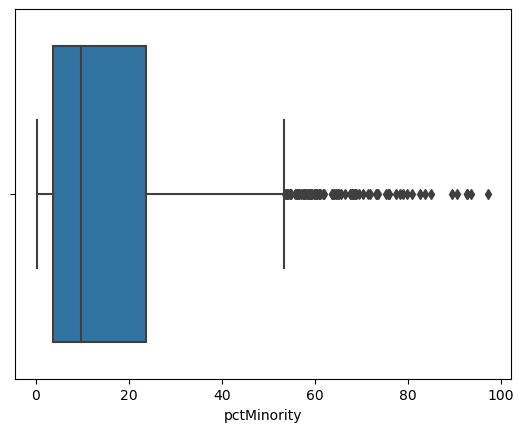

In [62]:
sns.boxplot(data=df_cleaned, x="pctMinority")

### PctLarcPerPop

The amount of larcenies per population, expressed as a percentage

In [63]:
df_cleaned['PctLarcPerPop'] = (df_cleaned['larcPerPop'] / df_cleaned['population']) * 100 #Creates a new column that divides larcPerPop by Population

<Axes: xlabel='PctLarcPerPop'>

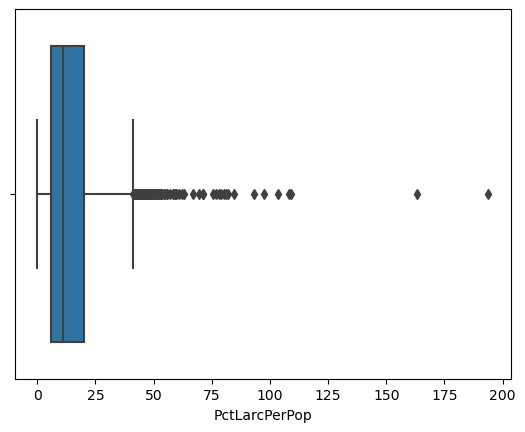

In [64]:
sns.boxplot(data=df_cleaned, x="PctLarcPerPop")

### PctSinglePar

The percent of single parent households in the community, measured by subtracting the amount of families with 2 parents from the whole

In [65]:
df_cleaned['PctSingleParent'] = 100 - df_cleaned['PctFam2Par'] # subtracts the amount of 2 parent households from the whole, leaving the percent of single parent households

<Axes: xlabel='PctSingleParent'>

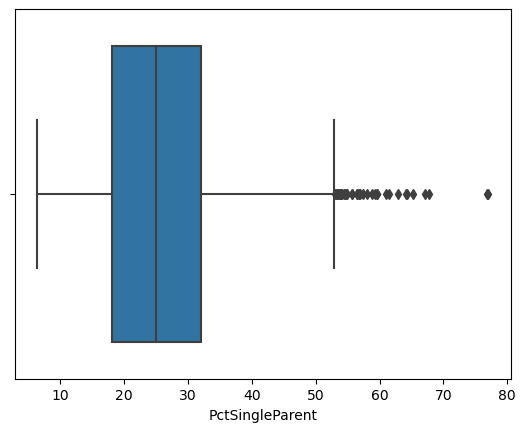

In [66]:
sns.boxplot(data=df_cleaned, x="PctSingleParent")

### FemalePctDiv

This is a measure of the percent of divorced females in the population. While it seems similar to the single parent indicator, it is different since the single parent indicator shows the amount of the population that is operating as a single parent household. Many divorced couples still co-parent and often will have a step-parent that would not normally be counted as a "parent". Divorce can have many turbulent outcomes, especially for children of divorced parents and women who experience the financial loss that a two-parent household may not.

In [67]:
df_cleaned['FemalePctDiv']

0        5.22
1        6.45
2       14.76
3       14.47
4       11.64
        ...  
2210    16.28
2211    16.12
2212    12.38
2213    14.36
2214    18.84
Name: FemalePctDiv, Length: 2212, dtype: float64

<Axes: xlabel='FemalePctDiv'>

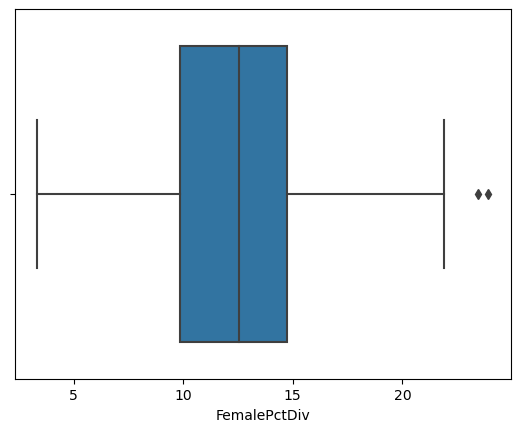

In [68]:
sns.boxplot(data=df_cleaned, x="FemalePctDiv")

### PctVacant

This is expressed as 100 minus the percentage of occupied houses, which will give us the total percentage of unoccupied or vacant houses. We currently have the number of vacant houses, but not the percentage in the community. This will serve as a community indicator for housing stability. Higher percentages mean housing instability, and lower percentages mean housing stability.

In [69]:
df_cleaned['PctVacant'] = 100 - df_cleaned['PctHousOccup']

<Axes: xlabel='PctVacant'>

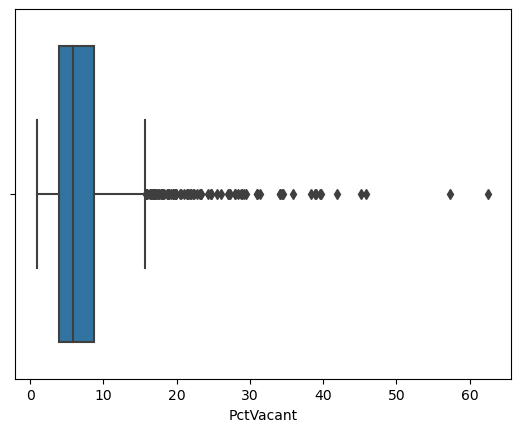

In [70]:
sns.boxplot(data=df_cleaned, x="PctVacant")

### PctPersDenseHous

This directly indicates the proportion of people living in overcrowded housing conditions. A higher value signifies greater density and potential housing instability.

In [71]:
df_cleaned['PctPersDenseHous']

0        0.39
1        1.01
2        2.03
3        1.21
4        2.94
        ...  
2210    16.89
2211     3.99
2212     4.39
2213     9.64
2214    11.31
Name: PctPersDenseHous, Length: 2212, dtype: float64

<Axes: xlabel='PctPersDenseHous'>

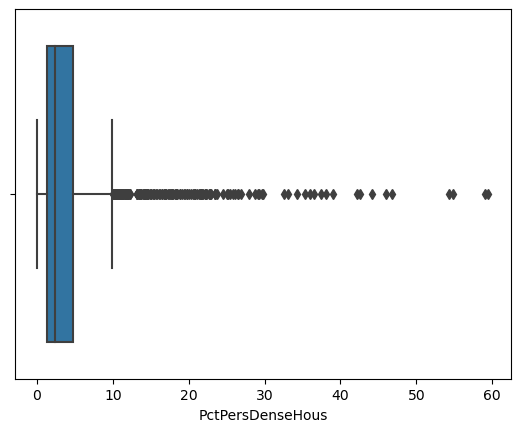

In [72]:
sns.boxplot(data=df_cleaned, x="PctPersDenseHous")

### PctUnhoused

In [73]:
df_cleaned['TotalHomeless'] = df_cleaned['NumInShelters'] + df_cleaned['NumStreet']

In [74]:
df_cleaned['PctUnhoused'] = ((df_cleaned['TotalHomeless'] / df_cleaned['population']) * 100).round(2)

In [75]:
df_cleaned['PctUnhoused']

0       0.09
1       0.00
2       0.05
3       0.00
4       0.02
        ... 
2210    0.11
2211    0.00
2212    0.13
2213    0.00
2214    0.04
Name: PctUnhoused, Length: 2212, dtype: float64

<Axes: xlabel='PctUnhoused'>

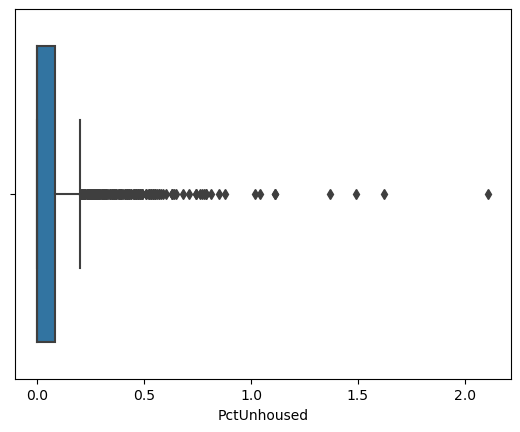

In [76]:
sns.boxplot(data=df_cleaned, x="PctUnhoused")

In [77]:
df_cleaned

commName state  fold  population  racepctblack  \
0     BerkeleyHeightstownship    NJ     1       11980          1.37   
1              Marpletownship    PA     1       23123          0.80   
2                  Tigardcity    OR     1       29344          0.74   
3            Gloversvillecity    NY     1       16656          1.70   
4                 Bemidjicity    MN     1       11245          0.53   
...                       ...   ...   ...         ...           ...   
2210               Mercedcity    CA    10       56216          6.87   
2211            Pinevillecity    LA    10       12251         21.18   
2212              Yucaipacity    CA    10       32824          0.52   
2213             Beevillecity    TX    10       13547          3.37   
2214       WestSacramentocity    CA    10       28898          2.39   

      racePctWhite  racePctAsian  racePctHisp  pctUrban  medIncome  ...  \
0            91.78          6.50         1.88    100.00      75122  ...   
1            95.57          3.44         0.85    100.00      47917  ...   
2            94.33          3.43         2.35    100.00      35669  ...   
3            97.35          0.50         0.70      0.00      20580  ...   
4            89.16          1.17         0.52      0.00      17390  ...   
...            ...           ...          ...       ...        ...  ...   
2210         61.68         15.23        29.86    100.00      24727  ...   
2211         76.65          1.52         1.29    100.00      20321  ...   
2212         92.62          0.98        11.00    100.00      27182  ...   
2213         69.91          0.90        62.11      0.00      19899  ...   
2214         71.27          9.09        24.43     99.19      23287  ...   

      LandArea  PopDens  PctUsePubTrans  larcPerPop  pctMinority  \
0          6.5   1845.9            9.63     1132.08         8.22   
1         10.6   2186.7            3.84     1598.78         4.43   
2         10.6   2780.9            4.37     4972.19         5.67   
3          5.2   3217.7            3.31     4142.56         2.65   
4         11.5    974.2            0.38     8490.87        10.84   
...        ...      ...             ...         ...          ...   
2210      16.7   3365.4            0.59     4225.82        38.32   
2211       7.3   1682.8            1.15     4748.90        23.35   
2212      27.5   1195.2            0.12     2435.97         7.38   
2213       6.3   2142.2            0.00     3722.90        30.09   
2214      21.7   1331.0            1.39     4819.20        28.73   

      PctLarcPerPop  PctSingleParent  PctVacant  TotalHomeless  PctUnhoused  
0          9.449750             8.57       1.63             11         0.09  
1          6.914241            13.09       2.85              0         0.00  
2         16.944486            21.46       4.32             16         0.05  
3         24.871278            35.98       8.81              0         0.00  
4         75.507959            41.41       7.55              2         0.02  
...             ...              ...        ...            ...          ...  
2210       7.517113            32.96       3.60             64         0.11  
2211      38.763366            31.43      10.28              0         0.00  
2212       7.421308            23.23       6.70             44         0.13  
2213      27.481361            32.24      14.61              0         0.00  
2214      16.676587            37.36       5.15             12         0.04  

[2212 rows x 69 columns]

## Creating the Model Dataframe Using Indicators

In [78]:
df_cleaned.columns

Index(['commName', 'state', 'fold', 'population', 'racepctblack',
       'racePctWhite', 'racePctAsian', 'racePctHisp', 'pctUrban', 'medIncome',
       'pctWFarmSelf', 'pctWInvInc', 'pctWPubAsst', 'pctWRetire', 'perCapInc',
       'PctPopUnderPov', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'FemalePctDiv', 'PctFam2Par', 'PctWorkMom', 'NumKidsBornNeverMar',
       'PctKidsBornNeverMar', 'PctImmigRec10', 'PctRecImmig5', 'PctRecImmig8',
       'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PersPerOccupHous',
       'PersPerRentOccHous', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccMedVal',
       'OwnOccQrange', 'RentQrange', 'MedRent', 'MedRentPctHousInc',
       'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters',
       'NumStreet', 'PctForeignBorn', 'Pct

#### After listing all of our columns out, we can choose which ones will be represented in the model dataframe. Make sure that none of the features used for feature engineering are present alongside engineered columns, as they will bleed information into eachother and make any models obselete. 

In [79]:
model_df = df_cleaned[['medIncome', 'pctWPubAsst', 'PctPopUnderPov',
       'PctNotHSGrad', 'PctUnemployed', 'FemalePctDiv', 'PctKidsBornNeverMar',
       'PctPersDenseHous', 'PctVacantBoarded', 'PctHousNoPhone',
       'PctWOFullPlumb', 'MedRent','PctForeignBorn', 'PctUsePubTrans',
       'pctMinority', 'PctLarcPerPop', 'PctVacant',
       'PctSingleParent', 'PctUnhoused']]

In [80]:
model_df.head(10)

medIncome  pctWPubAsst  PctPopUnderPov  PctNotHSGrad  PctUnemployed  \
0      75122         1.03            1.96          9.90           2.70   
1      47917         2.75            3.98         13.72           2.43   
2      35669         2.94            4.75          9.09           4.01   
3      20580        11.71           17.23         33.68           9.86   
4      17390        11.21           29.99         23.06           9.08   
5      21577         7.12           17.78         23.03           5.72   
6      42805         5.41            4.01         13.89           4.85   
7      23221         8.81           17.98         28.67           8.19   
8      25326         4.21           13.68         11.27           4.18   
9      17852         9.06           28.68         31.62           8.39   

   FemalePctDiv  PctKidsBornNeverMar  PctPersDenseHous  PctVacantBoarded  \
0          5.22                 0.36              0.39              3.12   
1          6.45                 0.24              1.01              0.00   
2         14.76                 0.88              2.03              0.92   
3         14.47                 3.84              1.21              2.54   
4         11.64                 4.70              2.94              3.90   
5         14.46                 1.58              2.11              2.09   
6          9.06                 1.18              1.47              1.41   
7         16.33                 4.66              1.90              6.39   
8          9.94                 1.64              1.67              0.45   
9         14.66                 4.71              6.14              5.64   

   PctHousNoPhone  PctWOFullPlumb  MedRent  PctForeignBorn  PctUsePubTrans  \
0            0.00            0.28     1001           10.66            9.63   
1            0.31            0.14      627            8.30            3.84   
2            1.55            0.12      484            5.00            4.37   
3            7.00            0.87      333            2.04            3.31   
4            7.45            0.82      332            1.74            0.38   
5            6.13            0.31      340            1.49            0.97   
6            0.69            0.28      736            9.19            9.62   
7            8.42            0.49      338            0.87            0.70   
8            2.66            0.19      355            1.99            1.41   
9           11.74            0.33      353            4.63            0.76   

   pctMinority  PctLarcPerPop  PctVacant  PctSingleParent  PctUnhoused  
0         8.22       9.449750       1.63             8.57         0.09  
1         4.43       6.914241       2.85            13.09         0.00  
2         5.67      16.944486       4.32            21.46         0.05  
3         2.65      24.871278       8.81            35.98         0.00  
4        10.84      75.507959       7.55            41.41         0.02  
5         4.35       3.624098       8.19            28.06         0.24  
6         3.43       3.394390       4.89            20.47         0.00  
7        15.13       6.208968       7.78            37.44         0.04  
8         2.89       5.325404       4.93            20.65         0.19  
9        32.40       5.477006      12.43            38.35         0.05

#### YAY! We now have a model dataframe with all community indicators that are best used to predict larcPerPop. Now we will change larcPerPop into a risk factor indicator, showing which communities have high rates of larceny, medium rates of larceny, and low rates of larceny.

## Larceny Risk Classification

#### This risk factor variable is determined by the distribution of the data. 75% of the data falls below 20.24%, so anything over that will be considered High-Risk and in need of intervention. Anything below 5.90% is considered low risk and not of concern. Medium-Risk categories are communities that potentially need more interventions before they become High-Risk. This will be a categorical variable that is taken out in modeling, and used to test our model on how well it can predict the risk factor for each community, based on the features in that community. 

In [81]:
# Over 20.24% larc per pop is considered high risk since 75% of data falls below
category = pd.cut(model_df.PctLarcPerPop,bins=[0,5.90,20.06,194],labels=['Low-Risk','Medium-Risk','High-Risk'])

In [82]:
model_df.insert(len(model_df.columns),'LarcRisk',category) # inserting new column into model df
model_df = model_df.drop(columns='PctLarcPerPop', axis=1) # dropping the column used to create risk column, to avoid data leakage

In [83]:
model_df.head(10)

medIncome  pctWPubAsst  PctPopUnderPov  PctNotHSGrad  PctUnemployed  \
0      75122         1.03            1.96          9.90           2.70   
1      47917         2.75            3.98         13.72           2.43   
2      35669         2.94            4.75          9.09           4.01   
3      20580        11.71           17.23         33.68           9.86   
4      17390        11.21           29.99         23.06           9.08   
5      21577         7.12           17.78         23.03           5.72   
6      42805         5.41            4.01         13.89           4.85   
7      23221         8.81           17.98         28.67           8.19   
8      25326         4.21           13.68         11.27           4.18   
9      17852         9.06           28.68         31.62           8.39   

   FemalePctDiv  PctKidsBornNeverMar  PctPersDenseHous  PctVacantBoarded  \
0          5.22                 0.36              0.39              3.12   
1          6.45                 0.24              1.01              0.00   
2         14.76                 0.88              2.03              0.92   
3         14.47                 3.84              1.21              2.54   
4         11.64                 4.70              2.94              3.90   
5         14.46                 1.58              2.11              2.09   
6          9.06                 1.18              1.47              1.41   
7         16.33                 4.66              1.90              6.39   
8          9.94                 1.64              1.67              0.45   
9         14.66                 4.71              6.14              5.64   

   PctHousNoPhone  PctWOFullPlumb  MedRent  PctForeignBorn  PctUsePubTrans  \
0            0.00            0.28     1001           10.66            9.63   
1            0.31            0.14      627            8.30            3.84   
2            1.55            0.12      484            5.00            4.37   
3            7.00            0.87      333            2.04            3.31   
4            7.45            0.82      332            1.74            0.38   
5            6.13            0.31      340            1.49            0.97   
6            0.69            0.28      736            9.19            9.62   
7            8.42            0.49      338            0.87            0.70   
8            2.66            0.19      355            1.99            1.41   
9           11.74            0.33      353            4.63            0.76   

   pctMinority  PctVacant  PctSingleParent  PctUnhoused     LarcRisk  
0         8.22       1.63             8.57         0.09  Medium-Risk  
1         4.43       2.85            13.09         0.00  Medium-Risk  
2         5.67       4.32            21.46         0.05  Medium-Risk  
3         2.65       8.81            35.98         0.00    High-Risk  
4        10.84       7.55            41.41         0.02    High-Risk  
5         4.35       8.19            28.06         0.24     Low-Risk  
6         3.43       4.89            20.47         0.00     Low-Risk  
7        15.13       7.78            37.44         0.04  Medium-Risk  
8         2.89       4.93            20.65         0.19     Low-Risk  
9        32.40      12.43            38.35         0.05     Low-Risk

In [84]:
model_df['LarcRisk'].value_counts()

Medium-Risk    1108
Low-Risk        553
High-Risk       551
Name: LarcRisk, dtype: int64

In [85]:
model_df.dtypes

medIncome                 int64
pctWPubAsst             float64
PctPopUnderPov          float64
PctNotHSGrad            float64
PctUnemployed           float64
FemalePctDiv            float64
PctKidsBornNeverMar     float64
PctPersDenseHous        float64
PctVacantBoarded        float64
PctHousNoPhone          float64
PctWOFullPlumb          float64
MedRent                   int64
PctForeignBorn          float64
PctUsePubTrans          float64
pctMinority             float64
PctVacant               float64
PctSingleParent         float64
PctUnhoused             float64
LarcRisk               category
dtype: object

In [86]:
# Convert the 'LarcRisk' column to string
model_df['LarcRisk'] = model_df['LarcRisk'].astype(str)

In [87]:
model_df.isna().sum()

medIncome              0
pctWPubAsst            0
PctPopUnderPov         0
PctNotHSGrad           0
PctUnemployed          0
FemalePctDiv           0
PctKidsBornNeverMar    0
PctPersDenseHous       0
PctVacantBoarded       0
PctHousNoPhone         0
PctWOFullPlumb         0
MedRent                0
PctForeignBorn         0
PctUsePubTrans         0
pctMinority            0
PctVacant              0
PctSingleParent        0
PctUnhoused            0
LarcRisk               0
dtype: int64

In [88]:
model_df.dtypes

medIncome                int64
pctWPubAsst            float64
PctPopUnderPov         float64
PctNotHSGrad           float64
PctUnemployed          float64
FemalePctDiv           float64
PctKidsBornNeverMar    float64
PctPersDenseHous       float64
PctVacantBoarded       float64
PctHousNoPhone         float64
PctWOFullPlumb         float64
MedRent                  int64
PctForeignBorn         float64
PctUsePubTrans         float64
pctMinority            float64
PctVacant              float64
PctSingleParent        float64
PctUnhoused            float64
LarcRisk                object
dtype: object

## Splitting the Data: Test/Train

#### To avoid data leakage, splitting first ensures that there is no contamination of the test set. The test set remains a proxy for unseen data and evaluates how well your model generalizes. I also ensures reproducible results. The feature selection process reflects the variability in the training data and avoids bias from including test set information.

In [89]:
from sklearn.model_selection import train_test_split

# Split your dataset into features (X) and target (y)
X = model_df.drop(columns=['LarcRisk'])  # Drop target variables
y = model_df['LarcRisk']  # Target variable

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1548, 18), (664, 18), (1548,), (664,))

### Version 2: Outlier Removal

In [91]:
import numpy as np

# Function to handle outliers using IQR
def remove_outliers(df, columns, multiplier=1.5):
    df_filtered = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    return df_filtered

# Apply outlier removal to X_train and X_test (excluding target)
columns = X_train.columns  # List of feature columns
X_train_no_ol = remove_outliers(X_train, columns)
X_test_no_ol = remove_outliers(X_test, columns)

# Filter target variables based on the retained indices
y_train_no_ol = y_train.loc[X_train_no_ol.index]
y_test_no_ol = y_test.loc[X_test_no_ol.index]

In [92]:
X_train_no_ol.shape, X_test_no_ol.shape, y_train_no_ol.shape, y_test_no_ol.shape

((963, 18), (397, 18), (963,), (397,))

## Dummy Model (Baseline)

In [93]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [94]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [95]:
dummy_clf.predict(X)

array(['Medium-Risk', 'Medium-Risk', 'Medium-Risk', ..., 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk'], dtype='<U11')

In [96]:
dummy_clf.score(X, y)

0.5009041591320073

## Model 1- Decision Tree Classifier

In [97]:
from sklearn import tree

clf = tree.DecisionTreeClassifier() #instantiate Decision Tree class

clf = clf.fit(X_train_no_ol, y_train_no_ol) #fit training data to the model

### Model 1 Evaluation

In [98]:
from sklearn import metrics
import numpy as np

#predict values from X_test
predicted = clf.predict(X_test_no_ol)

clf.score(X_test_no_ol, y_test_no_ol)

print(metrics.classification_report(y_test_no_ol, predicted))

              precision    recall  f1-score   support

   High-Risk       0.36      0.38      0.37        96
    Low-Risk       0.36      0.31      0.34        86
 Medium-Risk       0.55      0.58      0.56       215

    accuracy                           0.47       397
   macro avg       0.43      0.42      0.42       397
weighted avg       0.47      0.47      0.47       397



### Model 1 Improvement- GridSearch and Cross Validation

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.5473013816925735
              precision    recall  f1-score   support

   High-Risk       0.43      0.28      0.34        96
    Low-Risk       0.40      0.22      0.29        86
 Medium-Risk       0.55      0.73      0.63       215

    accuracy                           0.51       397
   macro avg       0.46      0.41      0.42       397
weighted avg       0.49      0.51      0.48       397



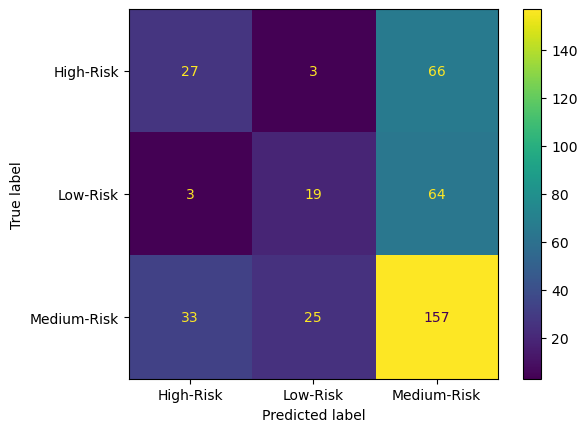

In [99]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# define parameters to cycle through
param_grid = {
    'criterion': ['gini', 'entropy'],  # Impurity metrics
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5]  # Minimum samples required in a leaf
}

#initialize GridSearch
grid_search = GridSearchCV(
    estimator=clf,  # Base model
    param_grid=param_grid,  # Grid of hyperparameters
    scoring='accuracy',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Verbosity (optional, for monitoring progress)
    n_jobs=-1  # Use all available CPUs
)

# fit the GridSearch to training data
grid_search.fit(X_train_no_ol, y_train_no_ol)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate performance on test data
best_clf = grid_search.best_estimator_  # Best model
y_pred = best_clf.predict(X_test_no_ol)

# Classification report
print(metrics.classification_report(y_test_no_ol, y_pred))

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_clf, X_test_no_ol, y_test_no_ol)

## Model 2- Decision Tree C5.0

### Iterating through max_leaf_nodes and evaluating different parameters

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [101]:
# iterate through different max_leaf_nodes values (from 5 to 20)
best_leaf_nodes = None
best_accuracy = 0
best_model_manual = None

for leaf_nodes in range(5, 21): 
    # initialize and train model with current max_leaf_nodes variable
    clf50 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=leaf_nodes)
    clf50.fit(X_train_no_ol, y_train_no_ol)
    
    # make predictions on test set
    pred_clf50 = clf50.predict(X_test_no_ol)
    
    # calculate accuracy
    accuracy = accuracy_score(y_test_no_ol, pred_clf50)
    
    # Update the best model if the current one has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_leaf_nodes = leaf_nodes
        best_model_manual = clf50  # Save the best model
        

### Model 2 Evalulation

In [103]:
# Print the best model from manual iteration
print(f"Best max_leaf_nodes from manual iteration: {best_leaf_nodes}")
print(f"Accuracy of best model: {best_accuracy:.4f}\n")
    
# Classification report for the best manual model
pred_best_manual = best_model_manual.predict(X_test_no_ol)
print("Classification Report for Best Manual Model:\n")
print(classification_report(y_test_no_ol, pred_best_manual))

Best max_leaf_nodes from manual iteration: 8
Accuracy of best model: 0.5567

Classification Report for Best Manual Model:

              precision    recall  f1-score   support

   High-Risk       0.71      0.12      0.21        96
    Low-Risk       0.40      0.19      0.25        86
 Medium-Risk       0.57      0.90      0.70       215

    accuracy                           0.56       397
   macro avg       0.56      0.40      0.39       397
weighted avg       0.56      0.56      0.48       397



### Model 2 Improvement- GridSearch and Cross Validation

In [105]:
# Add GridSearchCV with Cross-Validation for further improvement
print("Performing GridSearchCV with Cross-Validation...")

# Define the parameter grid
param_grid = {'max_leaf_nodes': [best_leaf_nodes], 'criterion': ['entropy', 'gini']}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_no_ol, y_train_no_ol)

# Retrieve the best model and parameters
best_model_grid = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best model from GridSearchCV
print("\nGridSearchCV Results:")
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Make predictions with the GridSearchCV best model
pred_best_model = best_model_grid.predict(X_test_no_ol)

# Print classification report for GridSearchCV best model
print("\nClassification Report for GridSearchCV Best Model:")
print(classification_report(y_test_no_ol, pred_best_model))

Performing GridSearchCV with Cross-Validation...
Fitting 5 folds for each of 2 candidates, totalling 10 fits

GridSearchCV Results:
Best Parameters: {'criterion': 'gini', 'max_leaf_nodes': 8}
Best Cross-Validation Accuracy: 0.5483

Classification Report for GridSearchCV Best Model:
              precision    recall  f1-score   support

   High-Risk       0.48      0.25      0.33        96
    Low-Risk       0.30      0.10      0.16        86
 Medium-Risk       0.56      0.82      0.67       215

    accuracy                           0.53       397
   macro avg       0.45      0.39      0.38       397
weighted avg       0.48      0.53      0.47       397



## Model 3- Decision Tree CART

In [106]:
cart01=DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5)

In [107]:
cart01.fit(X_train_no_ol,y_train_no_ol)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)

### Model 3 Evaluation

In [108]:
pred=cart01.predict(X_test_no_ol) 

print(classification_report(y_test_no_ol,pred))

              precision    recall  f1-score   support

   High-Risk       0.00      0.00      0.00        96
    Low-Risk       0.38      0.12      0.18        86
 Medium-Risk       0.55      0.94      0.69       215

    accuracy                           0.54       397
   macro avg       0.31      0.35      0.29       397
weighted avg       0.38      0.54      0.41       397



C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model 3 Improvement- GridSearch and Cross Validation

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['entropy', 'gini'],            # Test both criteria
    'max_leaf_nodes': range(0, 5),             # Test max_leaf_nodes from 2 to 20
    'min_samples_split': [2, 5, 10],            # Minimum samples to split
    'min_samples_leaf': [1, 2, 5],              # Minimum samples in leaf
    'max_depth': [None, 5, 10, 15]              # Maximum tree depth
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42), 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5,  # 5-fold cross-validation
    verbose=1, 
    n_jobs=-1  # Use all available processors
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_no_ol, y_train_no_ol)

# Retrieve the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results of GridSearchCV
print("\nGridSearchCV Results:")
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Make predictions with the GridSearchCV best model
best_pred = best_model.predict(X_test_no_ol)

# Print the classification report for the GridSearchCV best model
print("\nClassification Report for Best Model from GridSearchCV:")
print(classification_report(y_test_no_ol, best_pred))

Fitting 5 folds for each of 360 candidates, totalling 1800 fits

GridSearchCV Results:
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.5452

Classification Report for Best Model from GridSearchCV:
              precision    recall  f1-score   support

   High-Risk       0.00      0.00      0.00        96
    Low-Risk       0.00      0.00      0.00        86
 Medium-Risk       0.54      1.00      0.70       215

    accuracy                           0.54       397
   macro avg       0.18      0.33      0.23       397
weighted avg       0.29      0.54      0.38       397



C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\kreda\anaconda3\Lib\site-packa

## Model 4- Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import numpy as np

In [111]:
best_criterion = None
best_n_estimators = 1
best_accuracy = 0
best_auc = 0
best_pred_rf = None
best_proba_rf = None

# Iterate over both Gini and Entropy criteria
for criterion in ['gini', 'entropy']:
    for n_estimators in range(1, 101):
        # Initialize and train model with current criterion and n_estimators
        rf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=42).fit(X_train_no_ol, y_train_no_ol)
        
        # Make predictions and calculate probabilities
        pred_rf = rf.predict(X_test_no_ol)
        proba_rf = rf.predict_proba(X_test_no_ol)
        
        # Calculate accuracy
        accuracy_rf_test = accuracy_score(y_test_no_ol, pred_rf)
        
        # Calculate ROC-AUC (multiclass or binary)
        if len(y_test.unique()) > 2:  # Multiclass scenario
            auc_rf_test = roc_auc_score(y_test_no_ol, proba_rf, multi_class='ovr')
        else:  # Binary classification
            auc_rf_test = roc_auc_score(y_test_no_ol, proba_rf[:, 1])
        
        # Update best model if current iteration performs better
        if accuracy_rf_test > best_accuracy or auc_rf_test > best_auc:
            best_criterion = criterion
            best_n_estimators = n_estimators
            best_accuracy = accuracy_rf_test
            best_auc = auc_rf_test
            best_pred_rf = pred_rf
            best_proba_rf = proba_rf

### Model 4- Evaluation

In [112]:
# Print the results of the best model
print(f"Best Model: Criterion = {best_criterion}, n_estimators = {best_n_estimators}")
print(f"Best Accuracy: {best_accuracy:.4f}, Best AUC: {best_auc:.4f}")

# Print classification report for the best model
print("\nClassification Report for Best Model:")
print(classification_report(y_test_no_ol, best_pred_rf))

Best Model: Criterion = entropy, n_estimators = 69
Best Accuracy: 0.5945, Best AUC: 0.7263

Classification Report for Best Model:
              precision    recall  f1-score   support

   High-Risk       0.63      0.41      0.49        96
    Low-Risk       0.55      0.20      0.29        86
 Medium-Risk       0.59      0.84      0.69       215

    accuracy                           0.59       397
   macro avg       0.59      0.48      0.49       397
weighted avg       0.59      0.59      0.56       397



### Model 4 Improvement- GridSearch and Cross Validation

In [113]:
# --- GridSearchCV and Cross-Validation Implementation ---
print("\nPerforming GridSearch and Cross-Validation...")

# Define the parameter grid
param_grid = {
    'n_estimators': range(max(1, best_n_estimators - 10), best_n_estimators + 11),  # Narrow range around best_n_estimators
    'criterion': [best_criterion],  # Use only the best criterion
    'max_depth': [None, 5, 10, 15, 20],  # Test different tree depths
    'min_samples_split': [2, 5, 10],  # Test varying minimum samples to split
    'min_samples_leaf': [1, 2, 4]  # Test varying minimum samples per leaf
}

# Instantiate the model with the best criterion
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',  # You can also use 'roc_auc' or 'f1_weighted' based on your metric
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Perform GridSearch
grid_search.fit(X_train_no_ol, y_train_no_ol)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Cross-validation score for the best model
cv_scores = cross_val_score(best_model, X_train_no_ol, y_train_no_ol, cv=5, scoring='accuracy')

# Print the results
print("\nBest Parameters from GridSearch:")
print(grid_search.best_params_)

print("\nCross-Validation Scores for Best Model:")
print(cv_scores)
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

# Evaluate the best model on the test set
best_model_pred = best_model.predict(X_test_no_ol)
print("\nClassification Report for Best Model from GridSearch:")
print(classification_report(y_test_no_ol, best_model_pred))


Performing GridSearch and Cross-Validation...
Fitting 5 folds for each of 945 candidates, totalling 4725 fits

Best Parameters from GridSearch:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 73}

Cross-Validation Scores for Best Model:
[0.59585492 0.55440415 0.62176166 0.55729167 0.671875  ]
Mean CV Accuracy: 0.6002

Classification Report for Best Model from GridSearch:
              precision    recall  f1-score   support

   High-Risk       0.59      0.36      0.45        96
    Low-Risk       0.62      0.27      0.37        86
 Medium-Risk       0.59      0.83      0.69       215

    accuracy                           0.59       397
   macro avg       0.60      0.49      0.51       397
weighted avg       0.60      0.59      0.56       397



### ROC Curve

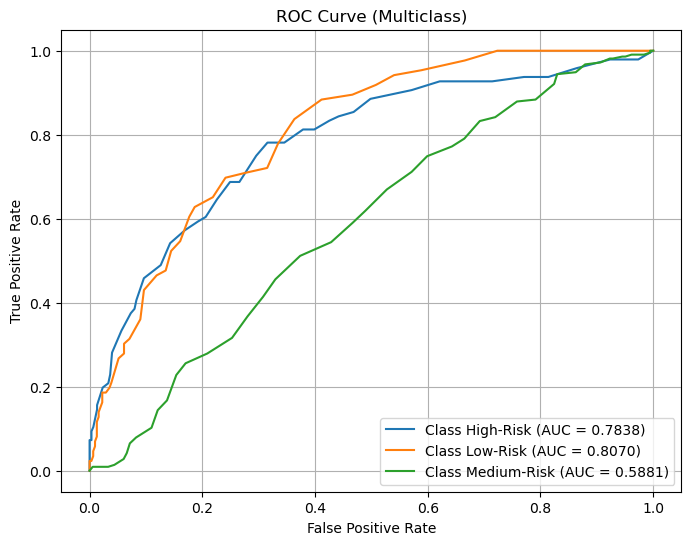

In [116]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curves for multiclass
if len(y_test_no_ol.unique()) > 2:
    plt.figure(figsize=(8, 6))
    for i, class_label in enumerate(best_model.classes_):
        fpr, tpr, _ = roc_curve(y_test_no_ol == class_label, best_proba_rf[:, i])
        plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc(fpr, tpr):.4f})")
    plt.title("ROC Curve (Multiclass)")
else:
    # Plot ROC curve for binary classification
    fpr, tpr, thresholds = roc_curve(y_test_no_ol, best_proba_rf[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='green', label=f"ROC Curve (AUC = {best_auc:.4f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for reference
    plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Confusion Matrix

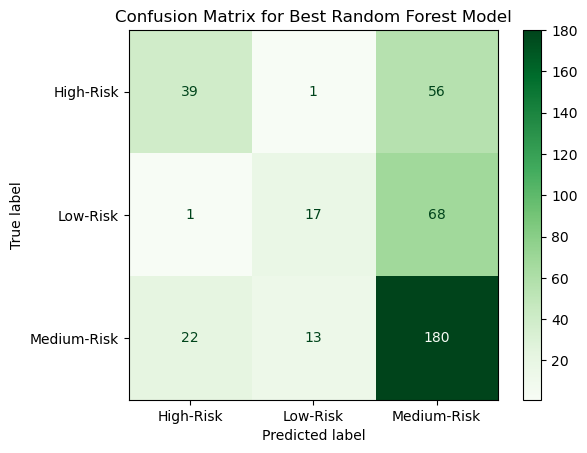

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate confusion matrix for the best predictions
conf_matrix = confusion_matrix(y_test_no_ol, best_pred_rf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix for Best Random Forest Model")
plt.show()

## Model 5- Gradient Boosting Classifier

In [119]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

In [120]:
# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [121]:
# Step 3: Train the model
gb_model.fit(X_train_no_ol, y_train_no_ol)

GradientBoostingClassifier(random_state=42)

In [122]:
# Step 4: Make predictions
y_pred = gb_model.predict(X_test_no_ol)

In [123]:
# If the target has more than two classes, we use the 'ovr' (one-vs-rest) approach for ROC-AUC
if len(np.unique(y)) > 2:
    y_pred_prob = gb_model.predict_proba(X_test_no_ol)
    roc_auc = roc_auc_score(y_test_no_ol, y_pred_prob, multi_class='ovr')
else:
    y_pred_prob = gb_model.predict_proba(X_test_no_ol)[:, 1]
    roc_auc = roc_auc_score(y_test_no_ol, y_pred_prob)

### Model 5 Evaluation

In [124]:
# Step 5: Evaluate model performance
# Calculate accuracy
accuracy = accuracy_score(y_test_no_ol, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test_no_ol, y_pred))

# Calculate F1 Score
f1 = f1_score(y_test_no_ol, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.2f}")

# Calculate and print ROC-AUC Score
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

   High-Risk       0.50      0.33      0.40        96
    Low-Risk       0.49      0.22      0.30        86
 Medium-Risk       0.57      0.78      0.66       215

    accuracy                           0.55       397
   macro avg       0.52      0.44      0.45       397
weighted avg       0.53      0.55      0.52       397

F1 Score (weighted): 0.52
ROC-AUC Score: 0.72


### Model 5 Improvement- GridSearch and Cross Validation

In [126]:
# --- GridSearchCV with K-Fold Cross-Validation ---
print("\nPerforming GridSearch and K-Fold Cross-Validation...")

# Define the parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up K-Fold Cross-Validation
k = 5  # 5-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # Adjust scoring metric if necessary
    cv=kf,
    verbose=1,
    n_jobs=-1
)

# Perform GridSearchCV
grid_search.fit(X_train_no_ol, y_train_no_ol)

# Get the best model from GridSearchCV
best_gb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_y_pred = best_gb_model.predict(X_test_no_ol)

# If the target has more than two classes, calculate ROC-AUC for multiclass
if len(np.unique(y)) > 2:
    best_y_pred_prob = best_gb_model.predict_proba(X_test_no_ol)
    best_roc_auc = roc_auc_score(y_test_no_ol, best_y_pred_prob, multi_class='ovr')
else:
    best_y_pred_prob = best_gb_model.predict_proba(X_test_no_ol)[:, 1]
    best_roc_auc = roc_auc_score(y_test_no_ol, best_y_pred_prob)

# Print best parameters and scores from GridSearch
print("\nBest Parameters from GridSearch:")
print(grid_search.best_params_)

print("\nEvaluation Metrics for Best Model:")
best_accuracy = accuracy_score(y_test_no_ol, best_y_pred)
best_f1 = f1_score(y_test_no_ol, best_y_pred, average='weighted')
print(f"Accuracy: {best_accuracy:.2f}")
print(f"F1 Score (weighted): {best_f1:.2f}")
print(f"ROC-AUC Score: {best_roc_auc:.2f}")

# Print classification report for the best model
print("Classification Report for Best Model:")
print(classification_report(y_test_no_ol, best_y_pred))


Performing GridSearch and K-Fold Cross-Validation...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

Best Parameters from GridSearch:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}

Evaluation Metrics for Best Model:
Accuracy: 0.57
F1 Score (weighted): 0.54
ROC-AUC Score: 0.74
Classification Report for Best Model:
              precision    recall  f1-score   support

   High-Risk       0.52      0.34      0.41        96
    Low-Risk       0.55      0.27      0.36        86
 Medium-Risk       0.58      0.79      0.67       215

    accuracy                           0.57       397
   macro avg       0.55      0.47      0.48       397
weighted avg       0.56      0.57      0.54       397



## Model 6- Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [138]:
# tranform y using LabelEncoder
# If 'LarcRisk' is not already binary, encode it
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_no_ol)
y_test_encoded = le.transform(y_test_no_ol)

In [139]:
# Scale X using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_ol)
X_test_scaled = scaler.transform(X_test_no_ol)

In [140]:
# Instantiate and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_encoded) # fit model to train data

LogisticRegression()

In [141]:
# Predict on the test set
pred_logr = log_reg.predict(X_test_scaled)

In [142]:
# Evaluate the model
accuracy = accuracy_score(y_test_encoded, pred_logr)
conf_matrix = confusion_matrix(y_test_encoded, pred_logr)
class_report = classification_report(y_test_encoded, pred_logr)

In [143]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.5819
Confusion Matrix:
[[ 40   1  55]
 [  1  11  74]
 [ 26   9 180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.42      0.49        96
           1       0.52      0.13      0.21        86
           2       0.58      0.84      0.69       215

    accuracy                           0.58       397
   macro avg       0.57      0.46      0.46       397
weighted avg       0.57      0.58      0.54       397



### Model 6 Improvement- GridSearchCV, L1 and L2 Regularization

In [155]:
from sklearn.model_selection import GridSearchCV

#### Lasso (L1) Regularization

In [156]:
# Lasso (L1) Regularization Tuning
lasso_param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
lasso_model = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000), lasso_param_grid, cv=5)
lasso_model.fit(X_train_scaled, y_train_encoded)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [157]:
# Evaluate Lasso
print("Best Lasso Regularization Parameter (C):", lasso_model.best_params_['C'])
lasso_accuracy = lasso_model.best_estimator_.score(X_test_scaled, y_test_encoded)
print(f"Lasso Test Accuracy: {lasso_accuracy:.4f}")

Best Lasso Regularization Parameter (C): 1
Lasso Test Accuracy: 0.5819


#### Ridge (L2) Regularization

In [158]:
# Ridge (L2) Regularization Tuning
ridge_param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strengths
ridge_model = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000), ridge_param_grid, cv=5)
ridge_model.fit(X_train_scaled, y_train_encoded)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [159]:
# Evaluate Ridge
print("Best Ridge Regularization Parameter (C):", ridge_model.best_params_['C'])
ridge_accuracy = ridge_model.best_estimator_.score(X_test_scaled, y_test_encoded)
print(f"Ridge Test Accuracy: {ridge_accuracy:.4f}")

Best Ridge Regularization Parameter (C): 0.01
Ridge Test Accuracy: 0.5768


## Model 7- K Means Clustering

In [144]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [145]:
# Scale X for KMeans (y is not needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_ol)
X_test_scaled = scaler.transform(X_test_no_ol)

In [146]:
# KMeans with 3 clusters
k_means = KMeans(n_clusters=3, n_init=10, random_state=42)
k_means.fit(X_train_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [147]:
# kmeans training metrics
inertia_train = k_means.inertia_
silhouette_train = silhouette_score(X_train_scaled, k_means.labels_)
print(f"Training Inertia: {inertia_train}")
print(f"Training Silhouette Score: {silhouette_train}")

Training Inertia: 10403.37402538108
Training Silhouette Score: 0.16161231796511707


In [148]:
# Kmeans testing metrics
k_means.fit(X_test_scaled)
inertia_test = k_means.inertia_
silhouette_test = silhouette_score(X_test_scaled, k_means.labels_)
print(f"Testing Inertia: {inertia_test}")
print(f"Testing Silhouette Score: {silhouette_test}")

Testing Inertia: 3825.1097318917405
Testing Silhouette Score: 0.1836338640860269


C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Model 7 Improvement- Cluster Tuning

In [160]:
import matplotlib.pyplot as plt

In [161]:
# Range of cluster numbers to test
cluster_range = range(2, 11)  # Try clusters from 2 to 10
inertia_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X_train_scaled)
    
    # Store metrics
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_scaled, kmeans.labels_))

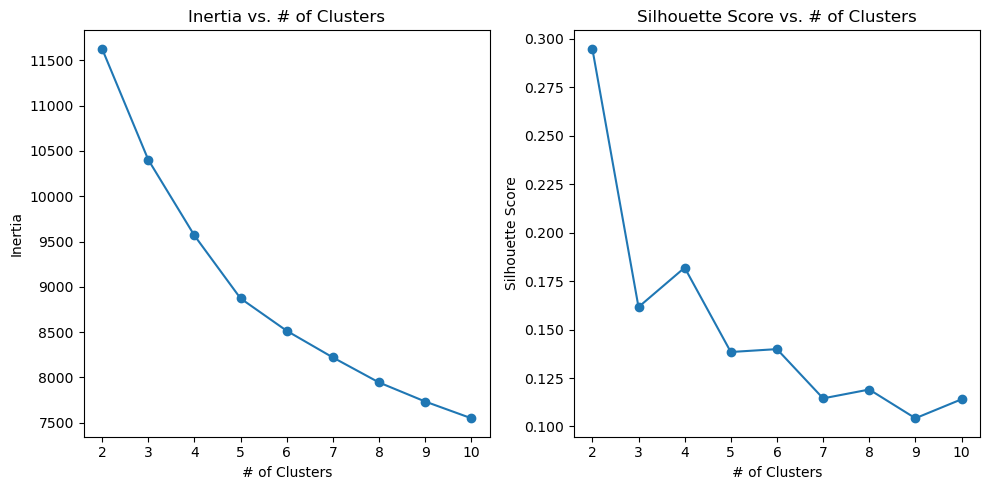

In [162]:
# Plot the results
plt.figure(figsize=(10, 5))

# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_scores, marker='o')
plt.title('Inertia vs. # of Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. # of Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [163]:
# Find the optimal number of clusters based on silhouette score
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters: {optimal_clusters}")

Optimal Number of Clusters: 2


In [164]:
# Refit KMeans with optimal clusters and evaluate
kmeans_optimal = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans_optimal.fit(X_train_scaled)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [165]:
# Metrics for the optimal model
inertia_optimal = kmeans_optimal.inertia_
silhouette_optimal = silhouette_score(X_train_scaled, kmeans_optimal.labels_)
print(f"Optimal Model Inertia: {inertia_optimal}")
print(f"Optimal Model Silhouette Score: {silhouette_optimal}")

Optimal Model Inertia: 11628.240746980231
Optimal Model Silhouette Score: 0.29489982376774676


## Model 8- Naive Bayes

In [149]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder

In [150]:
# Transform y using LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_no_ol)
y_test_encoded = le.transform(y_test_no_ol)

In [151]:
#Instantiate and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_no_ol, y_train_encoded)

MultinomialNB()

In [152]:
# Perform Grid Search
param = {"alpha": [0.01, 0.1, 0.5, 1.0, 10.0, 100.0]}
nb_model_cv = GridSearchCV(MultinomialNB(), param, cv=10)
nb_model_cv.fit(X_train_no_ol, y_train_encoded)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, 100.0]})

In [153]:
# Evaluate on test set
test_accuracy = nb_model_cv.best_estimator_.score(X_test_no_ol, y_test_encoded)
train_accuracy = nb_model_cv.best_estimator_.score(X_train_no_ol, y_train_encoded)
print(f"Best Parameters: {nb_model_cv.best_params_['alpha']}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Train Accuracy: {train_accuracy}")

Best Parameters: 100.0
Test Accuracy: 0.5012594458438288
Train Accuracy: 0.48390446521287644


In [154]:
# Cross-Validation Scores
k = 5
cross_val = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(nb_model, X_train_no_ol, y_train_encoded, cv=cross_val)
print("Naive Bayes Cross-Validation Scores:", scores)
print("Naive Bayes Average of All Folds:", scores.mean())

Naive Bayes Cross-Validation Scores: [0.50777202 0.41968912 0.41968912 0.375      0.484375  ]
Naive Bayes Average of All Folds: 0.44130505181347146


In [ ]:
# # Save the processed DataFrame to a CSV file
# processed_file_path = "finalForm_CrimeData.csv"
# df_cleaned.to_csv(processed_file_path, index=False)

# print(f"DataFrame saved to {processed_file_path}")